In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class CONFIG:
    DATA_DIR = "F:/Data/UPSELL_V4/"
    DATA_PATH = DATA_DIR + "data.csv"
    TARGET_COLUMNS = 'IS_UPSELL_NEXT_3_MONTHS'
    COL_TO_DROP = ['CUSTOMER_CODE', 'RANK_', 'CUSTOMER_CODE_INFO', 'LOAN_WID', 'THANG', 'CREATED_DT', 'LOAN_DPD', 'LAST_DATE', 'FIRST_DATE', 'MIN_DISB_DATE', 'DISBURSE_DATE_WID']
    TRAIN_DF = DATA_DIR + 'train.csv'
    TEST_DF = DATA_DIR+ 'test.csv'
    INFER_DF = DATA_DIR+ 'INFER_UPSELL_ASSET_DATA_202304041611_infer.csv'

In [3]:
train_df = pd.read_csv(CONFIG.TRAIN_DF)
test_df = pd.read_csv(CONFIG.TEST_DF)

C:\Users\duclh3\AppData\Local\Temp\ipykernel_33160\3361546251.py:1: DtypeWarning: Columns (111) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(CONFIG.TRAIN_DF)


In [4]:
train_df['DATE_TIME'] = pd.to_datetime(train_df['DATE_TIME'])
test_df['DATE_TIME'] = pd.to_datetime(test_df['DATE_TIME'])

In [5]:
null_cols = train_df.isnull().sum()/ train_df.shape[0]*100
null_cols.sort_values(ascending=False)

B_SCORE                    95.158384
SALARY_TYPE_CODE           83.357350
MONTHLY_INCOME_VALUE       76.684019
TIME_TO_CONTRACT_3M        75.601007
A_SCORE                    74.155206
                             ...    
AVG_LTV_12M                 0.000000
AVG_LTV_9M                  0.000000
AVG_LTV_6M                  0.000000
AVG_LTV_3M                  0.000000
IS_UPSELL_NEXT_3_MONTHS     0.000000
Length: 118, dtype: float64

In [6]:
train_df['WORKPLACE_CODE']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
709221    NaN
709222    NaN
709223    2.0
709224    2.0
709225    1.0
Name: WORKPLACE_CODE, Length: 709226, dtype: float64

In [7]:
train_df['MAX_CLOSE_DATE']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
709221    NaN
709222    NaN
709223    NaN
709224    NaN
709225    NaN
Name: MAX_CLOSE_DATE, Length: 709226, dtype: object

In [8]:
numerical = [x for x in train_df.columns if train_df[x].dtypes in [np.int64, np.float64] and null_cols[x]<96 and x not in ["CUSTOMER_CODE_2","DATE_TIME", "NEXT_DISBURSE_DATE_WID", "TIME_TO_DISBURSE","PAPER_ID", CONFIG.TARGET_COLUMNS]]

In [82]:
categorical  = [x for x in train_df.columns if x not in numerical]
categorical

['TIME_TO_DISBURSE',
 'DATE_TIME',
 'NEXT_DISBURSE_DATE_WID',
 'MAX_CLOSE_DATE',
 'CUSTOMER_CODE_2',
 'ASSET_TYPE',
 'GENDER',
 'PROVINCE',
 'JOB_NM',
 'INDUSTRY_NM',
 'MARITAL_STATUS',
 'TRADE_LEAD',
 'PROVINCE_NM',
 'PAPER_ID',
 'ZALO',
 'FACEBOOK',
 'GRP_NM',
 'JOB_NM_WCD',
 'IS_UPSELL_NEXT_3_MONTHS']

In [93]:
train_df['JOB_NM_WCD'].value_counts(dropna=False).index

Index([                                      nan,
                                    'Bán hàng',
                                'Công nhân/Thợ',
                 'Thợ xây/ sửa chữa/cơ khí…',
                                'Không xác định',
                          'Nhân viên văn phòng',
                   'Tài xế công nghệ/Shipper',
       'Đầu bếp/Phụ bếp/Bồi bàn/Phục vụ',
                'Thợ làm tóc/trang điểm/Spa',
                                      'Thợ may',
       'Quân đội/Công An/Viên chức nhà nước',
                           'Tài xế công nghệ',
                                      'Bảo vệ',
                  'Quản lý/Chủ Doanh nghiệp',
                               'Bác sĩ/Kỹ sư',
                        'Tiểu thương buôn bán',
                                     'Sinh viên',
                'Giúp việc/Tạp vụ/ Vệ sinh'],
      dtype='object')

In [94]:
train_df.groupby(['JOB_NM_WCD'])['IS_UPSELL_NEXT_3_MONTHS'].value_counts(dropna=False)

JOB_NM_WCD                               IS_UPSELL_NEXT_3_MONTHS
Bác sĩ/Kỹ sư                          1                           1296
                                         0                           1146
Bán hàng                               1                          76782
                                         0                          66715
Bảo vệ                                 1                           3483
                                         0                           2706
Công nhân/Thợ                           1                          51450
                                         0                          41977
Giúp việc/Tạp vụ/ Vệ sinh           1                             16
                                         0                              7
Không xác định                           0                          36488
                                         1                          30848
Nhân viên văn phòng                     1     

In [98]:
train_df.groupby(['JOB_NM_WCD','INDUSTRY_NM'])['IS_UPSELL_NEXT_3_MONTHS'].value_counts(dropna=False)

JOB_NM_WCD                               INDUSTRY_NM                    IS_UPSELL_NEXT_3_MONTHS
Bác sĩ/Kỹ sư                          Chuyên môn/Công nghệ/Khoa học  1                           43
                                                                        0                           38
                                         Công nghiệp/Thực phẩm/Cơ khí   0                          132
                                                                        1                          121
                                         Dịch vụ Công cộng/Hộ gia đình  0                          122
                                                                                                  ... 
Đầu bếp/Phụ bếp/Bồi bàn/Phục vụ  Điện nước/Xăng dầu/Khoáng sản  0                           50
                                         Đào tạo/giáo dục               0                           79
                                                                        1       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Thợ làm tóc/trang điểm/Spa'),
  Text(1, 0, 'Không xác định'),
  Text(2, 0, 'Bán hàng'),
  Text(3, 0, 'Nhân viên văn phòng'),
  Text(4, 0, 'Tài xế công nghệ'),
  Text(5, 0, 'Thợ xây/ sửa chữa/cơ khí…'),
  Text(6, 0, 'Quản lý/Chủ Doanh nghiệp'),
  Text(7, 0, 'Bảo vệ'),
  Text(8, 0, 'Đầu bếp/Phụ bếp/Bồi bàn/Phục vụ'),
  Text(9, 0, 'Tài xế công nghệ/Shipper'),
  Text(10, 0, 'Tiểu thương buôn bán'),
  Text(11, 0, 'Công nhân/Thợ'),
  Text(12, 0, 'Quân đội/Công An/Viên chức nhà nước'),
  Text(13, 0, 'Thợ may'),
  Text(14, 0, 'Bác sĩ/Kỹ sư'),
  Text(15, 0, 'Sinh viên'),
  Text(16, 0, 'Giúp việc/Tạp vụ/ Vệ sinh')])

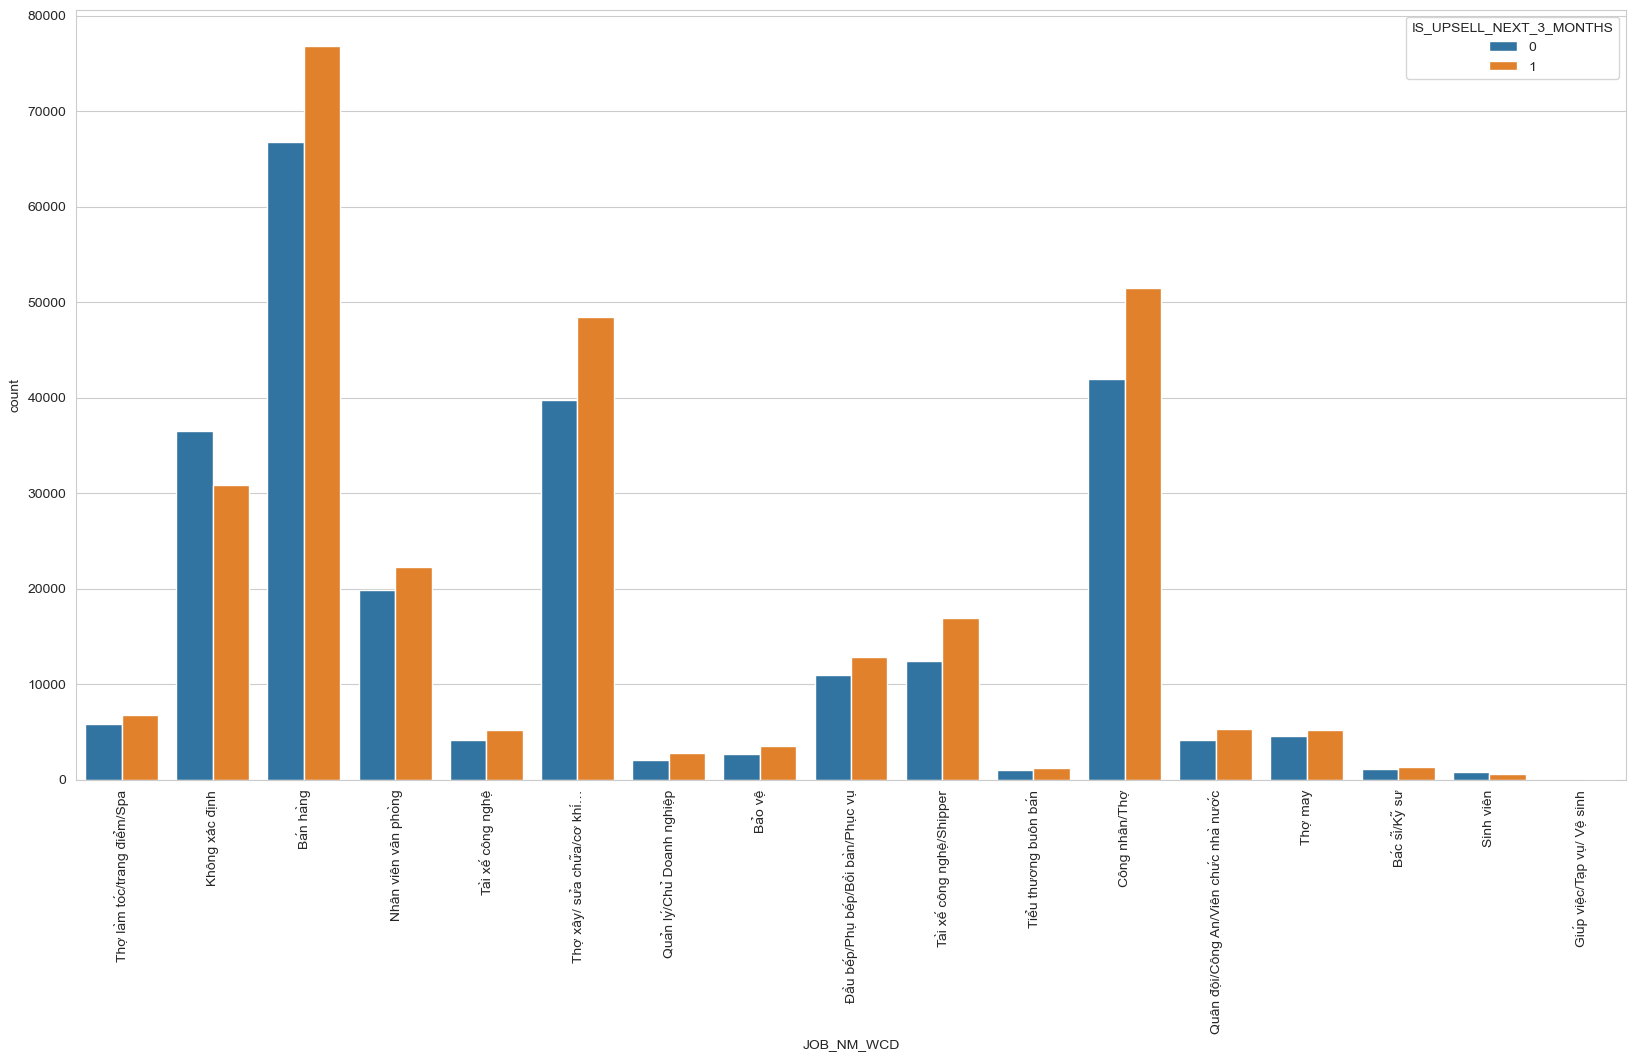

In [97]:
plt.figure(figsize=(20,10))
sns.countplot(x="JOB_NM_WCD", hue="IS_UPSELL_NEXT_3_MONTHS",data=train_df)
plt.xticks(rotation=90)

In [60]:
test_df['MARITAL_STATUS'].value_counts(dropna=False)

NaN                     105762
Đã kết hôn               34834
Độc thân                 29003
Đã li dị/ly thân/góa      4802
Không chia sẻ             3926
Không xác định             192
Name: MARITAL_STATUS, dtype: int64

In [10]:
'DAYS_FROM_MAX_DISB' in numerical

True

In [102]:
list(train_df['JOB_NM_WCD'].unique())

['Thợ làm tóc/trang điểm/Spa',
 'Không xác định',
 'Bán hàng',
 'Nhân viên văn phòng',
 'Tài xế công nghệ',
 'Thợ xây/ sửa chữa/cơ khí…',
 nan,
 'Quản lý/Chủ Doanh nghiệp',
 'Bảo vệ',
 'Đầu bếp/Phụ bếp/Bồi bàn/Phục vụ',
 'Tài xế công nghệ/Shipper',
 'Tiểu thương buôn bán',
 'Công nhân/Thợ',
 'Quân đội/Công An/Viên chức nhà nước',
 'Thợ may',
 'Bác sĩ/Kỹ sư',
 'Sinh viên',
 'Giúp việc/Tạp vụ/ Vệ sinh']

In [11]:
from lightgbm import LGBMRegressor, LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [12]:
categorical_features = ["GENDER","INDUSTRY_NM","GRP_NM", "TRADE_LEAD", "ASSET_TYPE"]

In [105]:
INDUSTRY_NM = ['Vận tải/Kho bãi/Cung ứng',
'Nông/Lâm/Thủy Sản',
'Thương mại /Bán buôn bán lẻ/Sửa chữa',
'Viễn thông/Truyền thông',
'Công nghiệp/Thực phẩm/Cơ khí',
'Dịch vụ Công cộng/Hộ gia đình',
'Nhà hàng/Khách sạn/Du lịch',
'Hộ kinh doanh buôn bán nhỏ',
'Y tế/Sức khỏe',
'Xây dựng/Bất động sản',
'Kinh doanh online',
'Điện nước/Xăng dầu/Khoáng sản',
'Giải trí/Nghệ thuật/Vui chơi',
'Tài chính/Ngân hàng/Bảo hiểm',
'Đơn vị quản lý Nhà nước',
'Đào tạo/giáo dục',
'Chuyên môn/Công nghệ/Khoa học']

GRP_NM = ['5 -> 8 triệu',
          '8 -> 10 triệu',
          '10 -> 15 triệu',
          '25 -> 45 triệu',
          '15 -> 25 triệu',
          '< 5 triệu',
          '> 45 triệu']
TRADE_LEAD = ['Hà Nội 1',
              'Hồ Chí Minh 1',
              'Hồ Chí Minh 2',
              'Hà Nội 2',
              'Đông Bắc Bộ 1',
              'Đông Nam Bộ',
              'Đông Bắc Bộ 2',
              'Tây Bắc Bộ',
              'Bắc Trung Bộ',
              'Tây Nam Bộ 2',
              'Tây Nam Bộ 1',
              'Đồng bằng Bắc Bộ',
              'Trung Bộ',
              'Nam Trung Bộ',
              'Tây Nguyên']
ASSET_TYPE = ['DKXM', 'DKOTO']
MARITAL_STATUS = ['Đã kết hôn', 'Độc thân','Đã li dị/ly thân/góa']
JOB_NM_WCD = ['Thợ làm tóc/trang điểm/Spa',
 'Bán hàng',
 'Nhân viên văn phòng',
 'Tài xế công nghệ',
 'Thợ xây/ sửa chữa/cơ khí…',
 'Quản lý/Chủ Doanh nghiệp',
 'Bảo vệ',
 'Đầu bếp/Phụ bếp/Bồi bàn/Phục vụ',
 'Tài xế công nghệ/Shipper',
 'Tiểu thương buôn bán',
 'Công nhân/Thợ',
 'Quân đội/Công An/Viên chức nhà nước',
 'Thợ may',
 'Bác sĩ/Kỹ sư',
 'Sinh viên',
 'Giúp việc/Tạp vụ/ Vệ sinh']

<AxesSubplot:xlabel='GRP_NM', ylabel='count'>

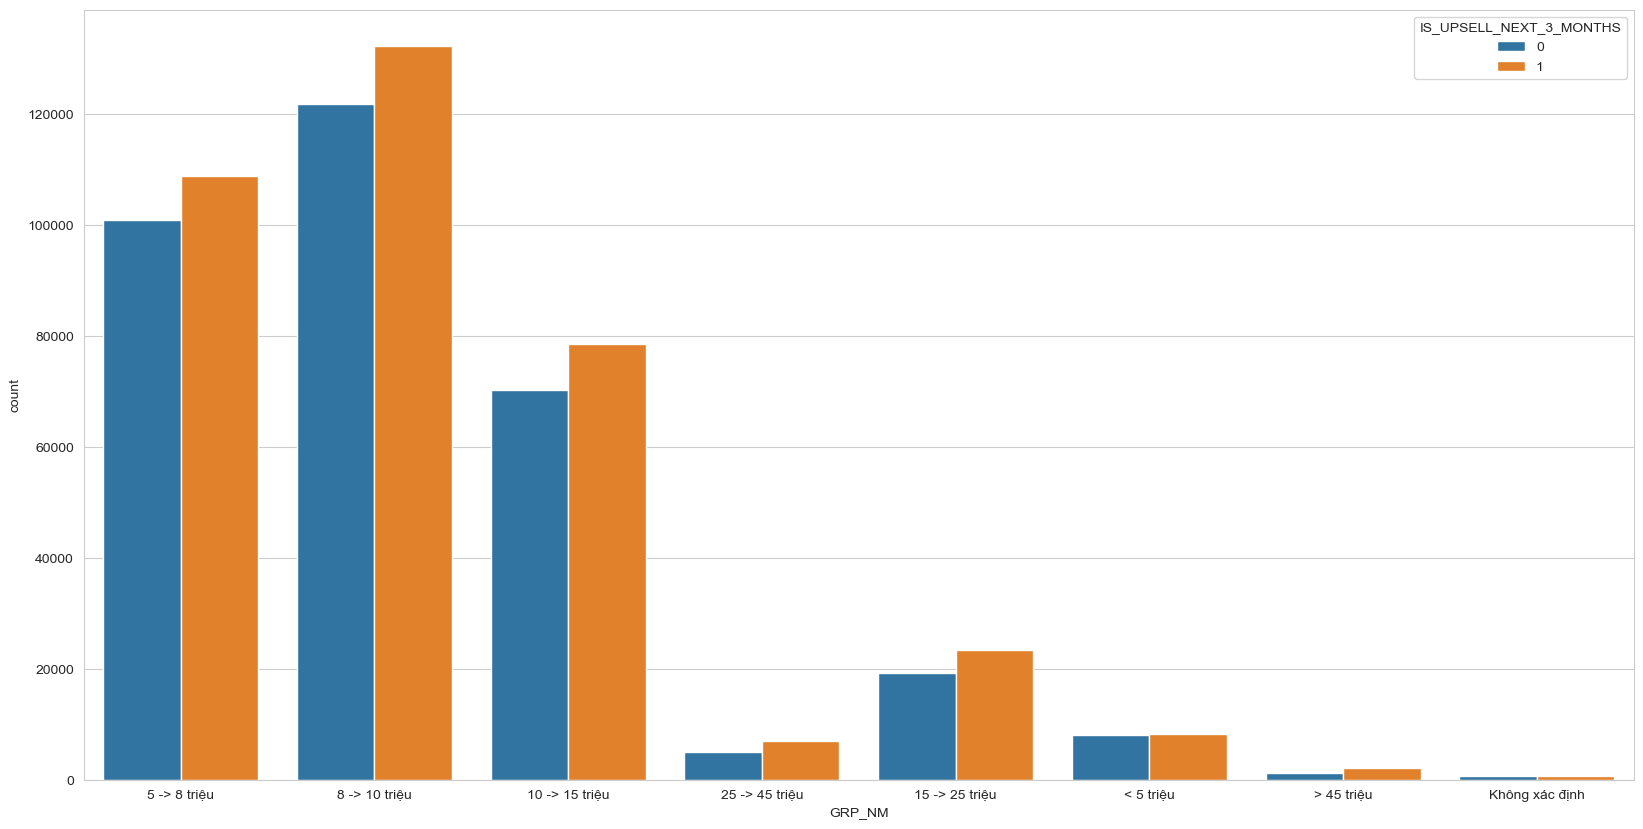

In [106]:
plt.figure(figsize=(20,10))
sns.countplot(x='GRP_NM', hue='IS_UPSELL_NEXT_3_MONTHS', data=train_df)

In [107]:
train_df['GRP_NM']

0           5 -> 8 triệu
1          8 -> 10 triệu
2          8 -> 10 triệu
3           5 -> 8 triệu
4         10 -> 15 triệu
               ...      
709221      5 -> 8 triệu
709222    10 -> 15 triệu
709223     8 -> 10 triệu
709224     8 -> 10 triệu
709225     8 -> 10 triệu
Name: GRP_NM, Length: 709226, dtype: object

In [108]:
def feature_engineering(df: pd.DataFrame = train_df):
    new_df = pd.DataFrame()
    for col in numerical:
        new_df[col] = df[col]
        new_df[col] = new_df[col].fillna(-999)
    new_df["CO_THE_VAY_THEM"] = new_df["CO_THE_VAY_THEM"].apply(lambda x: max(0, x))
    # for col in categorical_features:
    #     new_df[col] = df[col]
    #     new_df[col] = new_df[col].astype('category')
    new_df['isMale'] = df['GENDER'] == "Male"
    new_df['isFemale'] = df['GENDER'] == "Female"
    for c in INDUSTRY_NM:
        new_df[f"INDUSTRY_NM_{c}"] = df["INDUSTRY_NM"] == c
    # for c in GRP_NM:
    #     new_df[f"GRP_NM_{c.replace('<','less than')}"] = df["GRP_NM"] == c
    new_df["GRP_NM"] = df["GRP_NM"].map({
        '< 5 triệu':100,
        '5 -> 8 triệu':200,
        '8 -> 10 triệu':300,
        '10 -> 15 triệu':400,
        '25 -> 45 triệu':500,
        '15 -> 25 triệu':500,
        '> 45 triệu':500
    })
    new_df["GRP_NM"].fillna(-999)
    for c in TRADE_LEAD:
        new_df[f"TRADE_LEAD_{c}"] = df["TRADE_LEAD"] == c
    # new_df["TRADE_LEAD"] = df["TRADE_LEAD"]
    for c in ASSET_TYPE:
        new_df[f"ASSET_TYPE_{c}"] = df["ASSET_TYPE"] == c
    # for c1 in TRADE_LEAD:
    #     for c2 in JOB_NM_WCD:
    #         new_df[f"TL_{c1}_{c2}"] = (df["TRADE_LEAD"] == c1) & (df["JOB_NM_WCD"] == c2)
    for c in JOB_NM_WCD:
        new_df[f"JOB_NM_WCD_{c}"] = df["JOB_NM_WCD"] == c
    return new_df

def target_encoder(train, valid, cat, target, smooth=20):
    x = train[[cat]].copy()
    x['target'] = target
    te = x.groupby(cat)['target'].agg(['mean', 'count']).reset_index()
    te.columns = [cat, 'TE_count','TE_mean']
    mn = x['target'].mean()
    te[cat+'_TE'] = ((te['TE_mean']*te['TE_count'])+(mn*smooth)) / (te['TE_count']+smooth)
    return train.merge(te, how='left', on=cat), valid.merge(te, how='left', on=cat)

#########################
Fold 0
#########################
[100]	training's binary_logloss: 0.481358	training's auc: 0.845803	valid_1's binary_logloss: 0.484422	valid_1's auc: 0.843028
[200]	training's binary_logloss: 0.469911	training's auc: 0.853953	valid_1's binary_logloss: 0.47734	valid_1's auc: 0.847659
[300]	training's binary_logloss: 0.463484	training's auc: 0.858623	valid_1's binary_logloss: 0.474593	valid_1's auc: 0.849425
[400]	training's binary_logloss: 0.45815	training's auc: 0.862433	valid_1's binary_logloss: 0.472685	valid_1's auc: 0.850541
[500]	training's binary_logloss: 0.452889	training's auc: 0.866122	valid_1's binary_logloss: 0.470774	valid_1's auc: 0.85168
[600]	training's binary_logloss: 0.448602	training's auc: 0.86918	valid_1's binary_logloss: 0.469831	valid_1's auc: 0.852169
[700]	training's binary_logloss: 0.444524	training's auc: 0.872022	valid_1's binary_logloss: 0.468793	valid_1's auc: 0.852736
[800]	training's binary_logloss: 0.440746	training's auc: 0.874

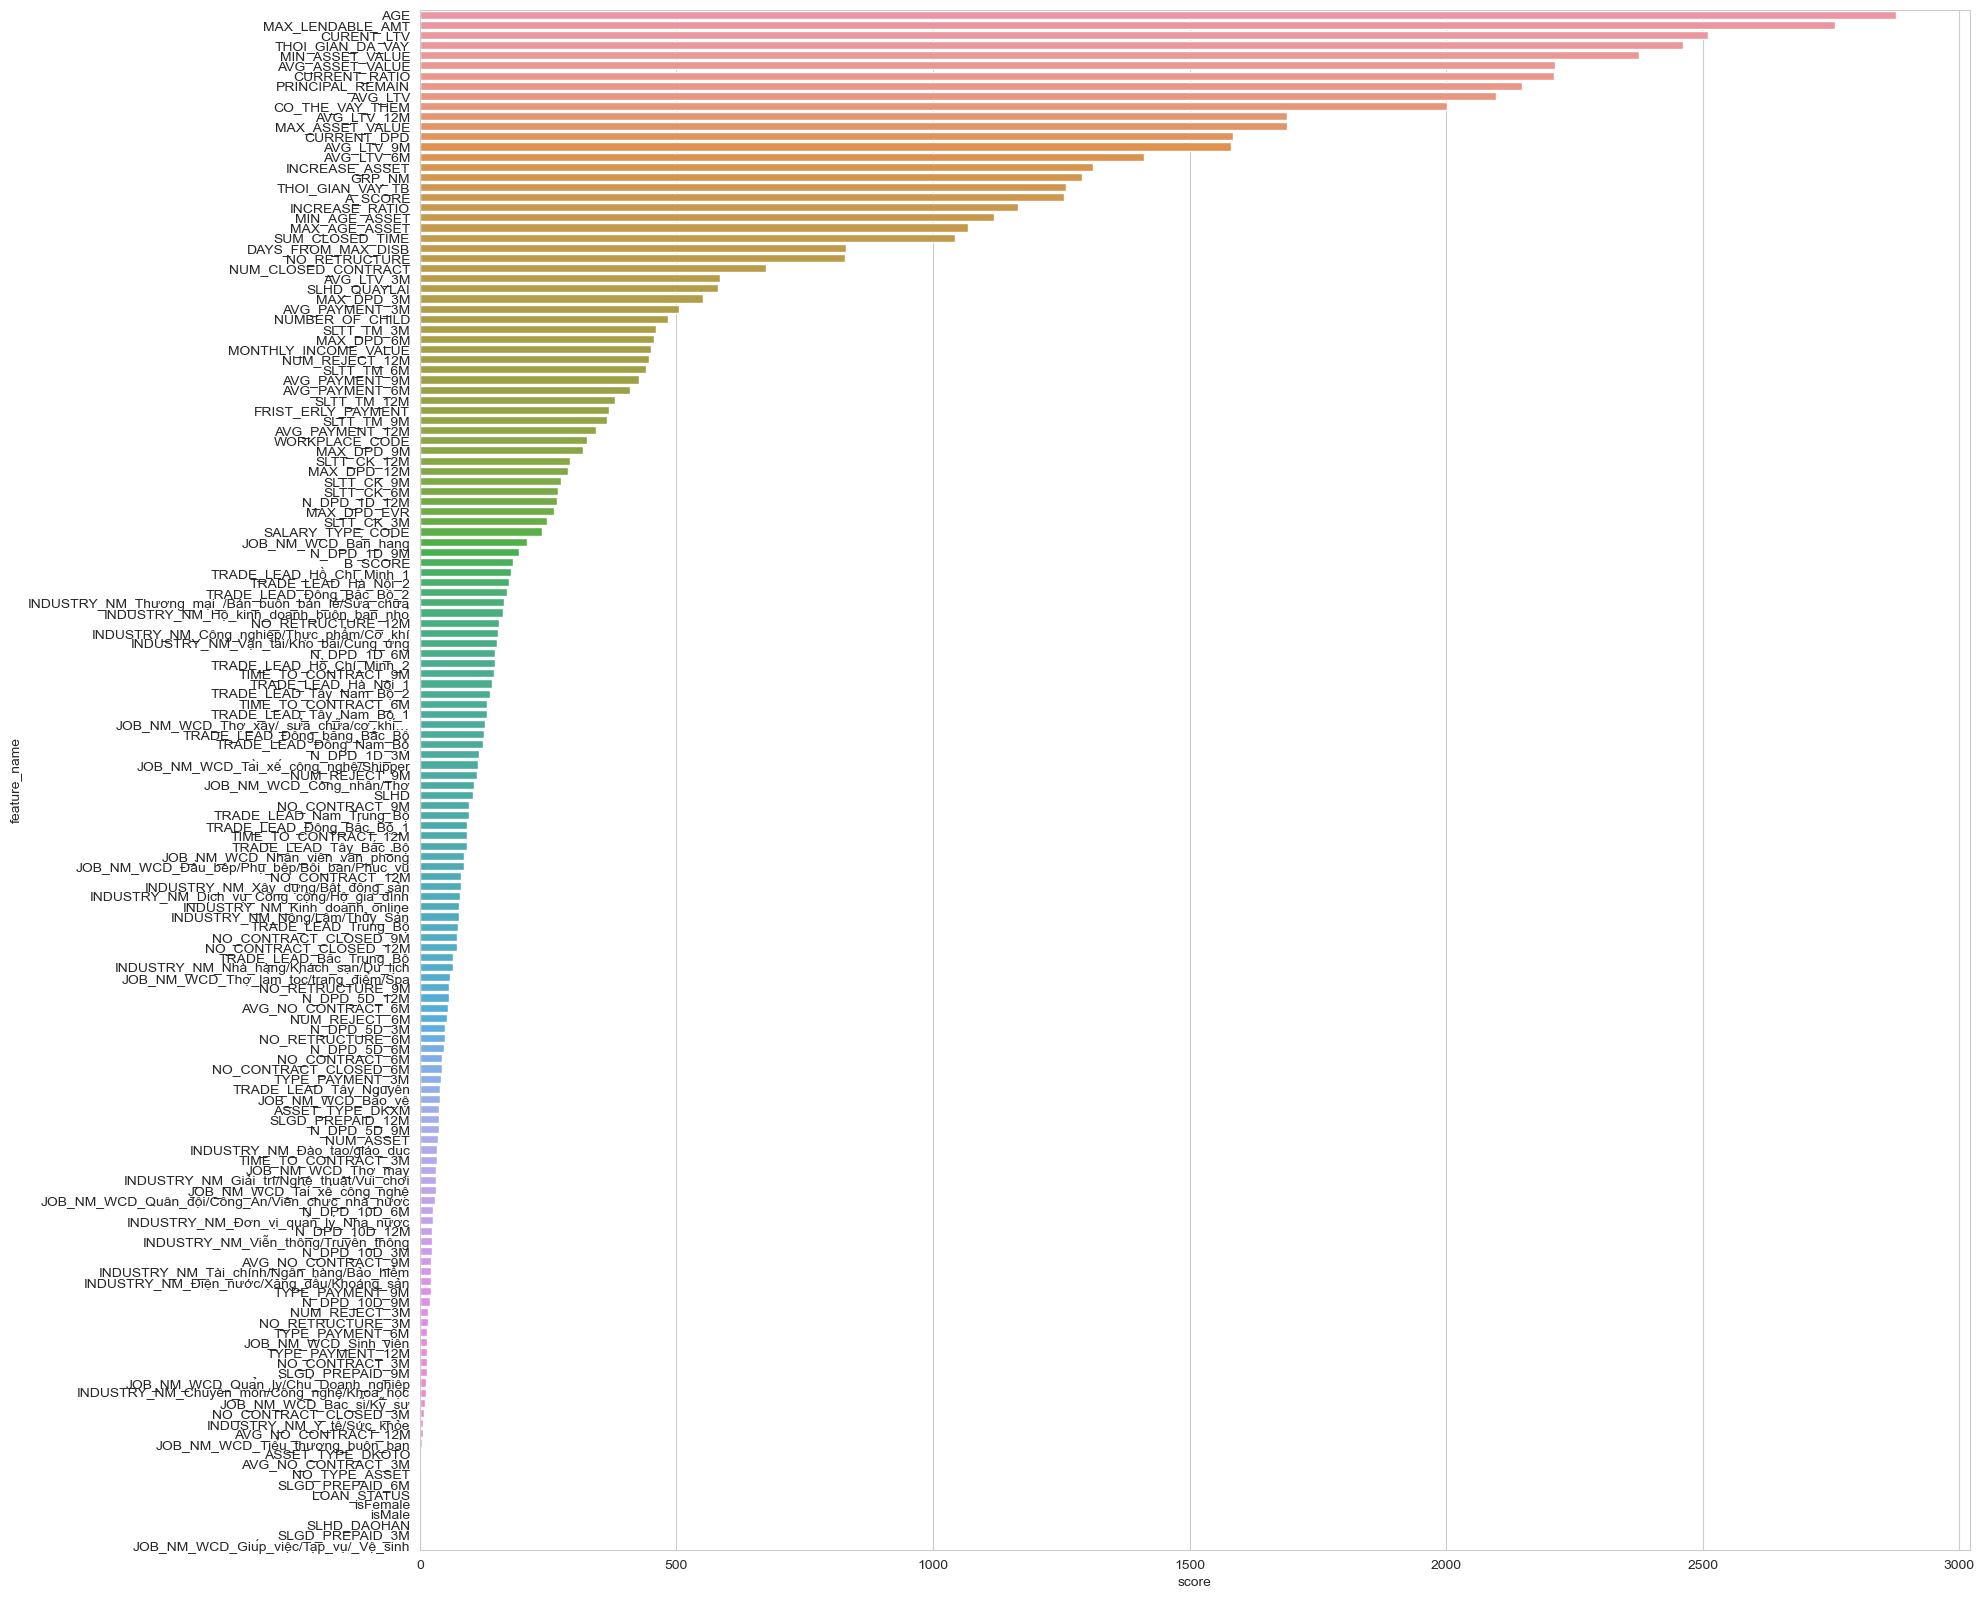

#########################
Fold 1
#########################
[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[100]	training's binary_logloss: 0.4806	training's auc: 0.846259	valid_1's binary_logloss: 0.486915	valid_1's auc: 0.840823
[200]	training's binary_logloss: 0.469208	training's auc: 0.854378	valid_1's binary_logloss: 0.479785	valid_1's auc: 0.845661
[300]	training's binary_logloss: 0.462394	training's auc: 0.859246	valid_1's binary_logloss: 0.476761	valid_1's auc: 0.847606
[400]	training's binary_logloss: 0.456511	training's auc: 0.86334	valid_1's binary_logloss: 0.474372	valid_1's auc: 0.849029
[500]	training's binary_logloss: 0.451902	training's auc: 0.866686	valid_1's binary_logloss: 0.473158	valid_1's auc: 0.849754
[600]	training's binary_logloss: 0.447667	training's auc: 0.869714	valid_1's binary_logloss: 0.472206	valid_1's auc: 0.850324
[700]	training's binary_logloss: 0.443737	training's auc: 0.872542	valid_1's binary_logloss: 0.47158	valid_1's auc: 0.850708
[8

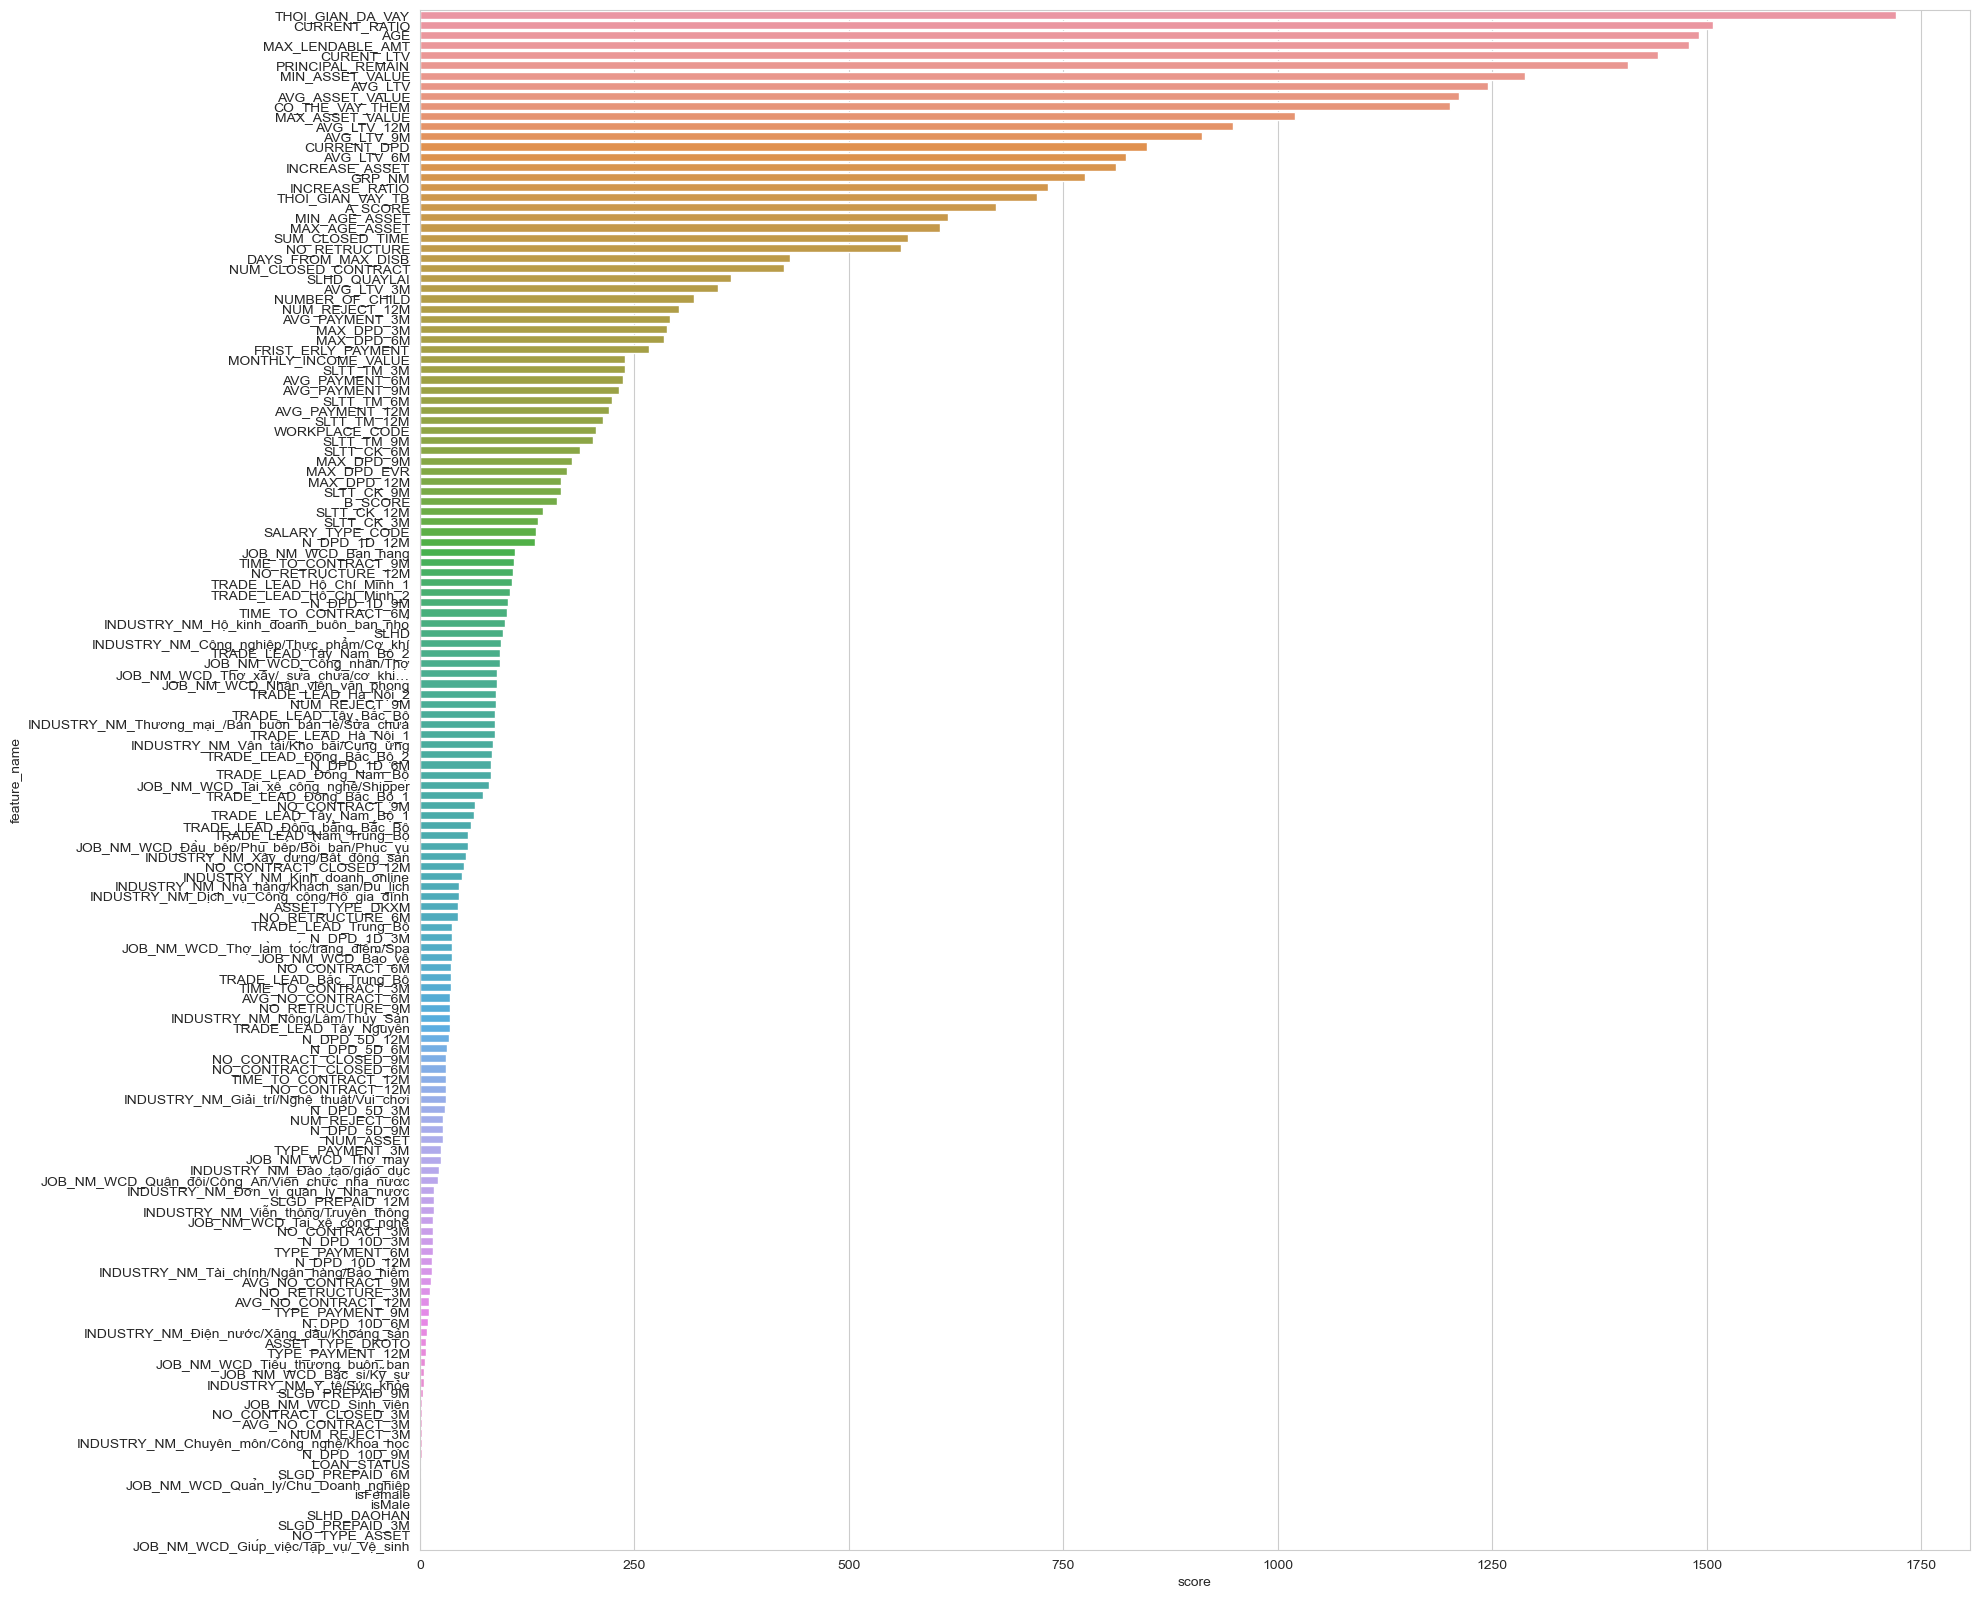

#########################
Fold 2
#########################
[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[100]	training's binary_logloss: 0.481615	training's auc: 0.845584	valid_1's binary_logloss: 0.485744	valid_1's auc: 0.841992
[200]	training's binary_logloss: 0.470038	training's auc: 0.853753	valid_1's binary_logloss: 0.47793	valid_1's auc: 0.847215
[300]	training's binary_logloss: 0.463558	training's auc: 0.858481	valid_1's binary_logloss: 0.47537	valid_1's auc: 0.848845
[400]	training's binary_logloss: 0.457947	training's auc: 0.862448	valid_1's binary_logloss: 0.473117	valid_1's auc: 0.850132
[500]	training's binary_logloss: 0.452952	training's auc: 0.866054	valid_1's binary_logloss: 0.471744	valid_1's auc: 0.850943
[600]	training's binary_logloss: 0.448621	training's auc: 0.869179	valid_1's binary_logloss: 0.470713	valid_1's auc: 0.851589
[700]	training's binary_logloss: 0.444803	training's auc: 0.87186	valid_1's binary_logloss: 0.469651	valid_1's auc: 0.852241
[

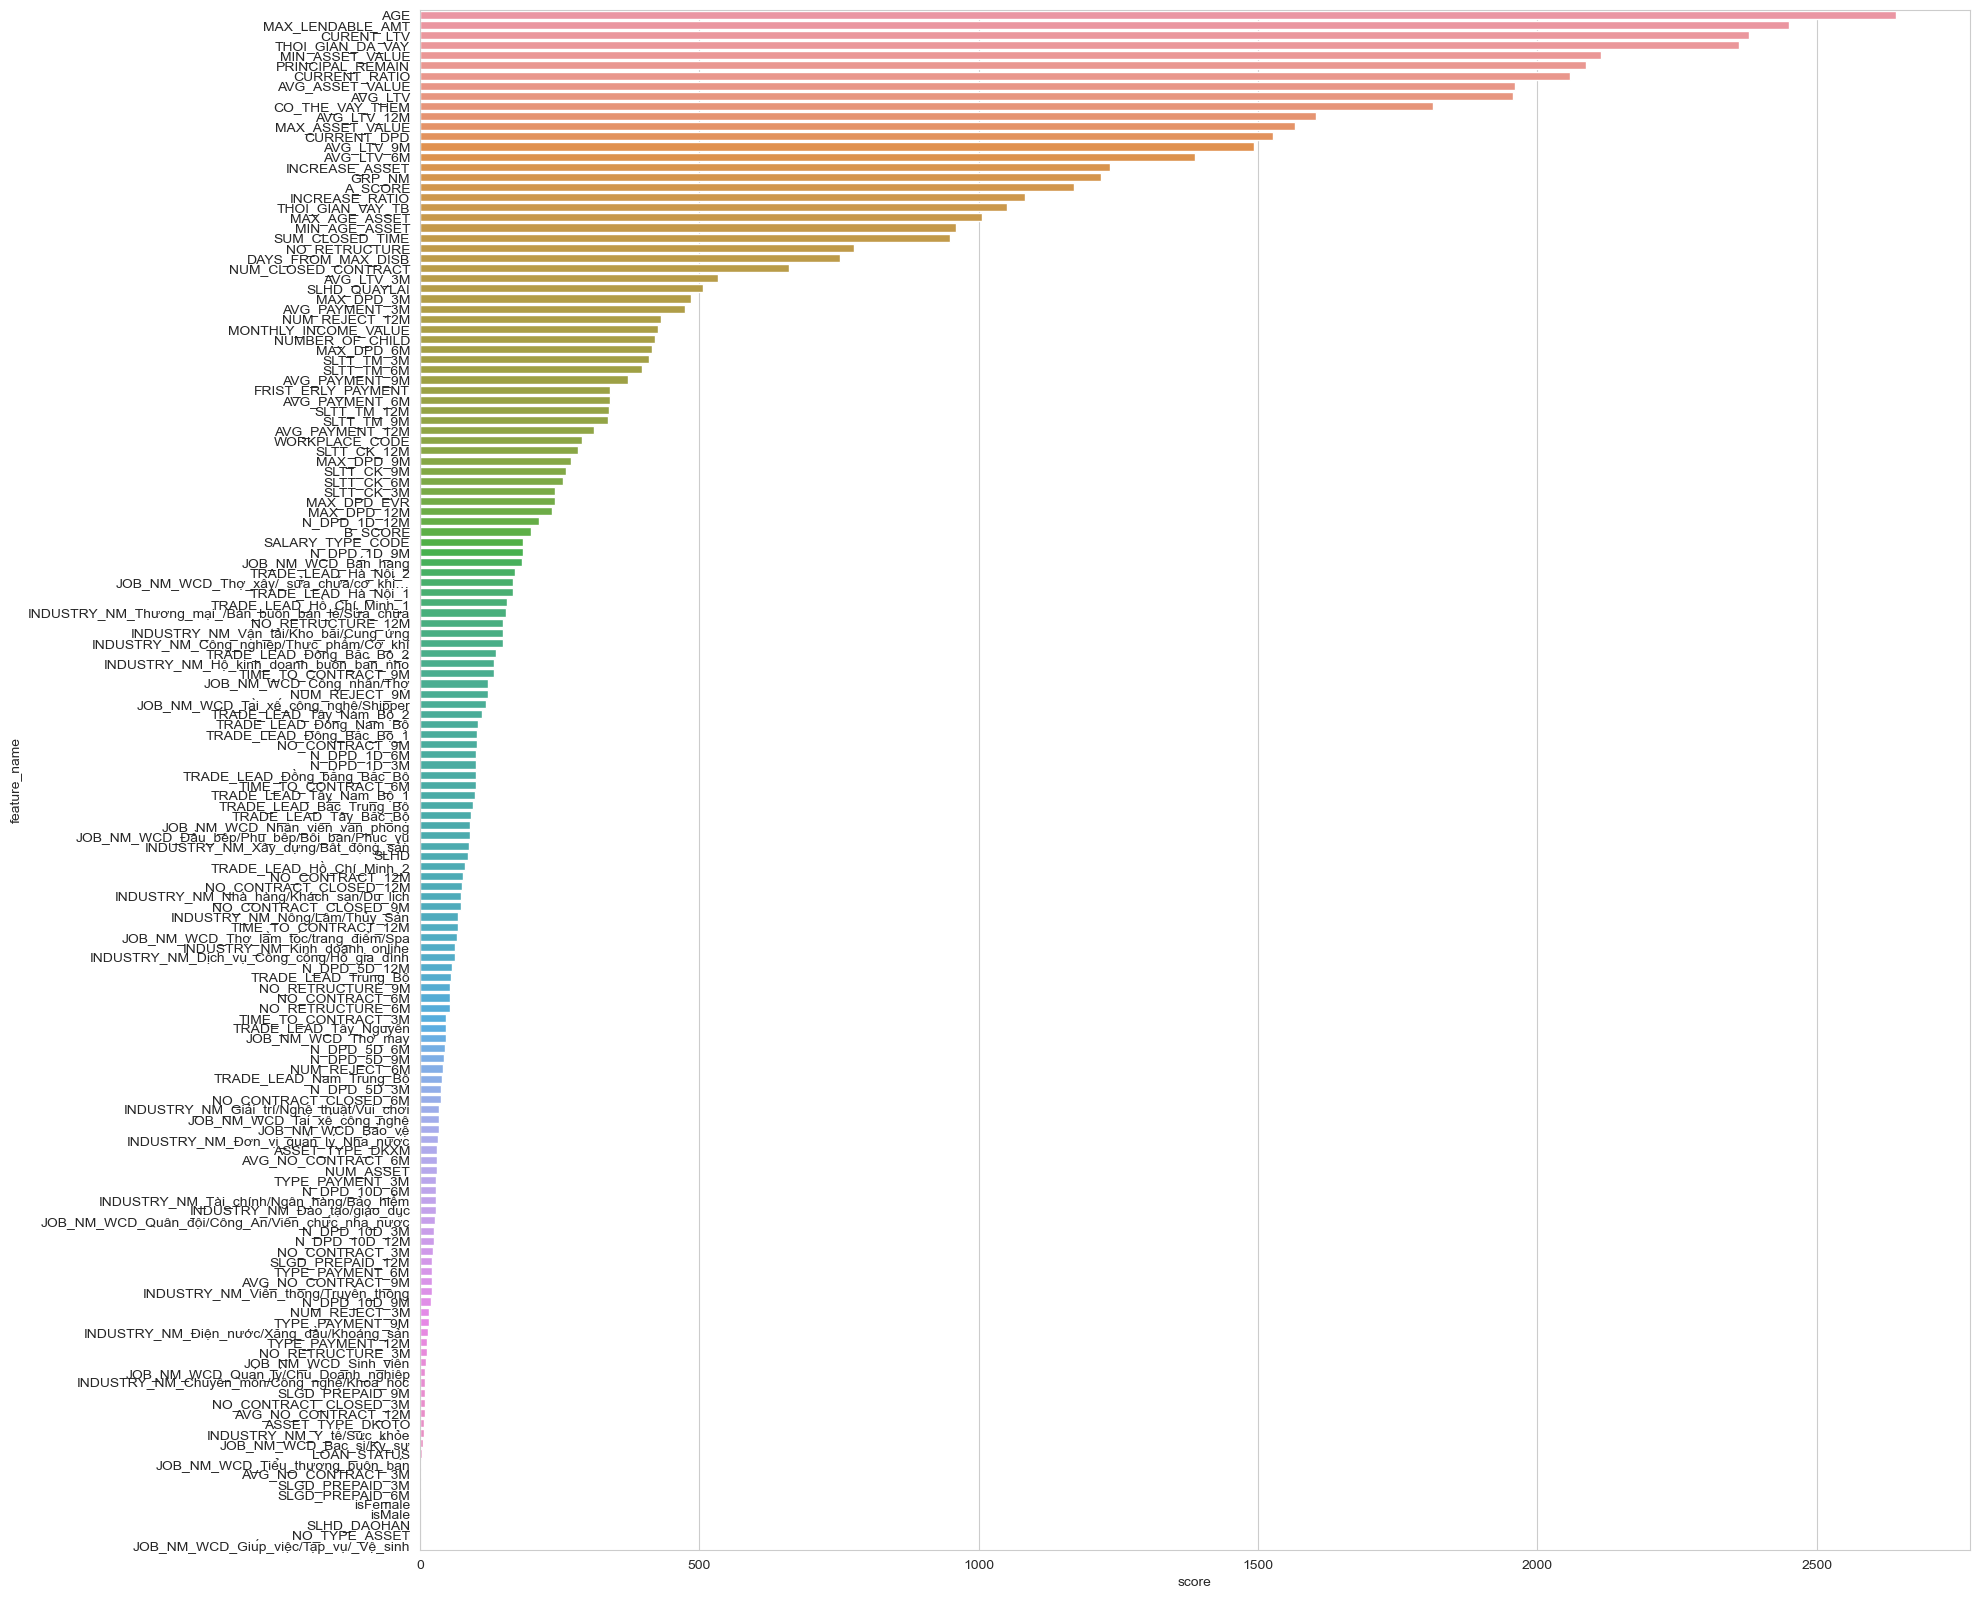

#########################
Fold 3
#########################
[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[100]	training's binary_logloss: 0.481763	training's auc: 0.845416	valid_1's binary_logloss: 0.483741	valid_1's auc: 0.843731
[200]	training's binary_logloss: 0.470398	training's auc: 0.853509	valid_1's binary_logloss: 0.476471	valid_1's auc: 0.848495
[300]	training's binary_logloss: 0.463561	training's auc: 0.858317	valid_1's binary_logloss: 0.47343	valid_1's auc: 0.850372
[400]	training's binary_logloss: 0.457721	training's auc: 0.862509	valid_1's binary_logloss: 0.471157	valid_1's auc: 0.851779
[500]	training's binary_logloss: 0.453219	training's auc: 0.865794	valid_1's binary_logloss: 0.47006	valid_1's auc: 0.852453
[600]	training's binary_logloss: 0.448969	training's auc: 0.868877	valid_1's binary_logloss: 0.469279	valid_1's auc: 0.852883
[700]	training's binary_logloss: 0.444831	training's auc: 0.871791	valid_1's binary_logloss: 0.468228	valid_1's auc: 0.853447


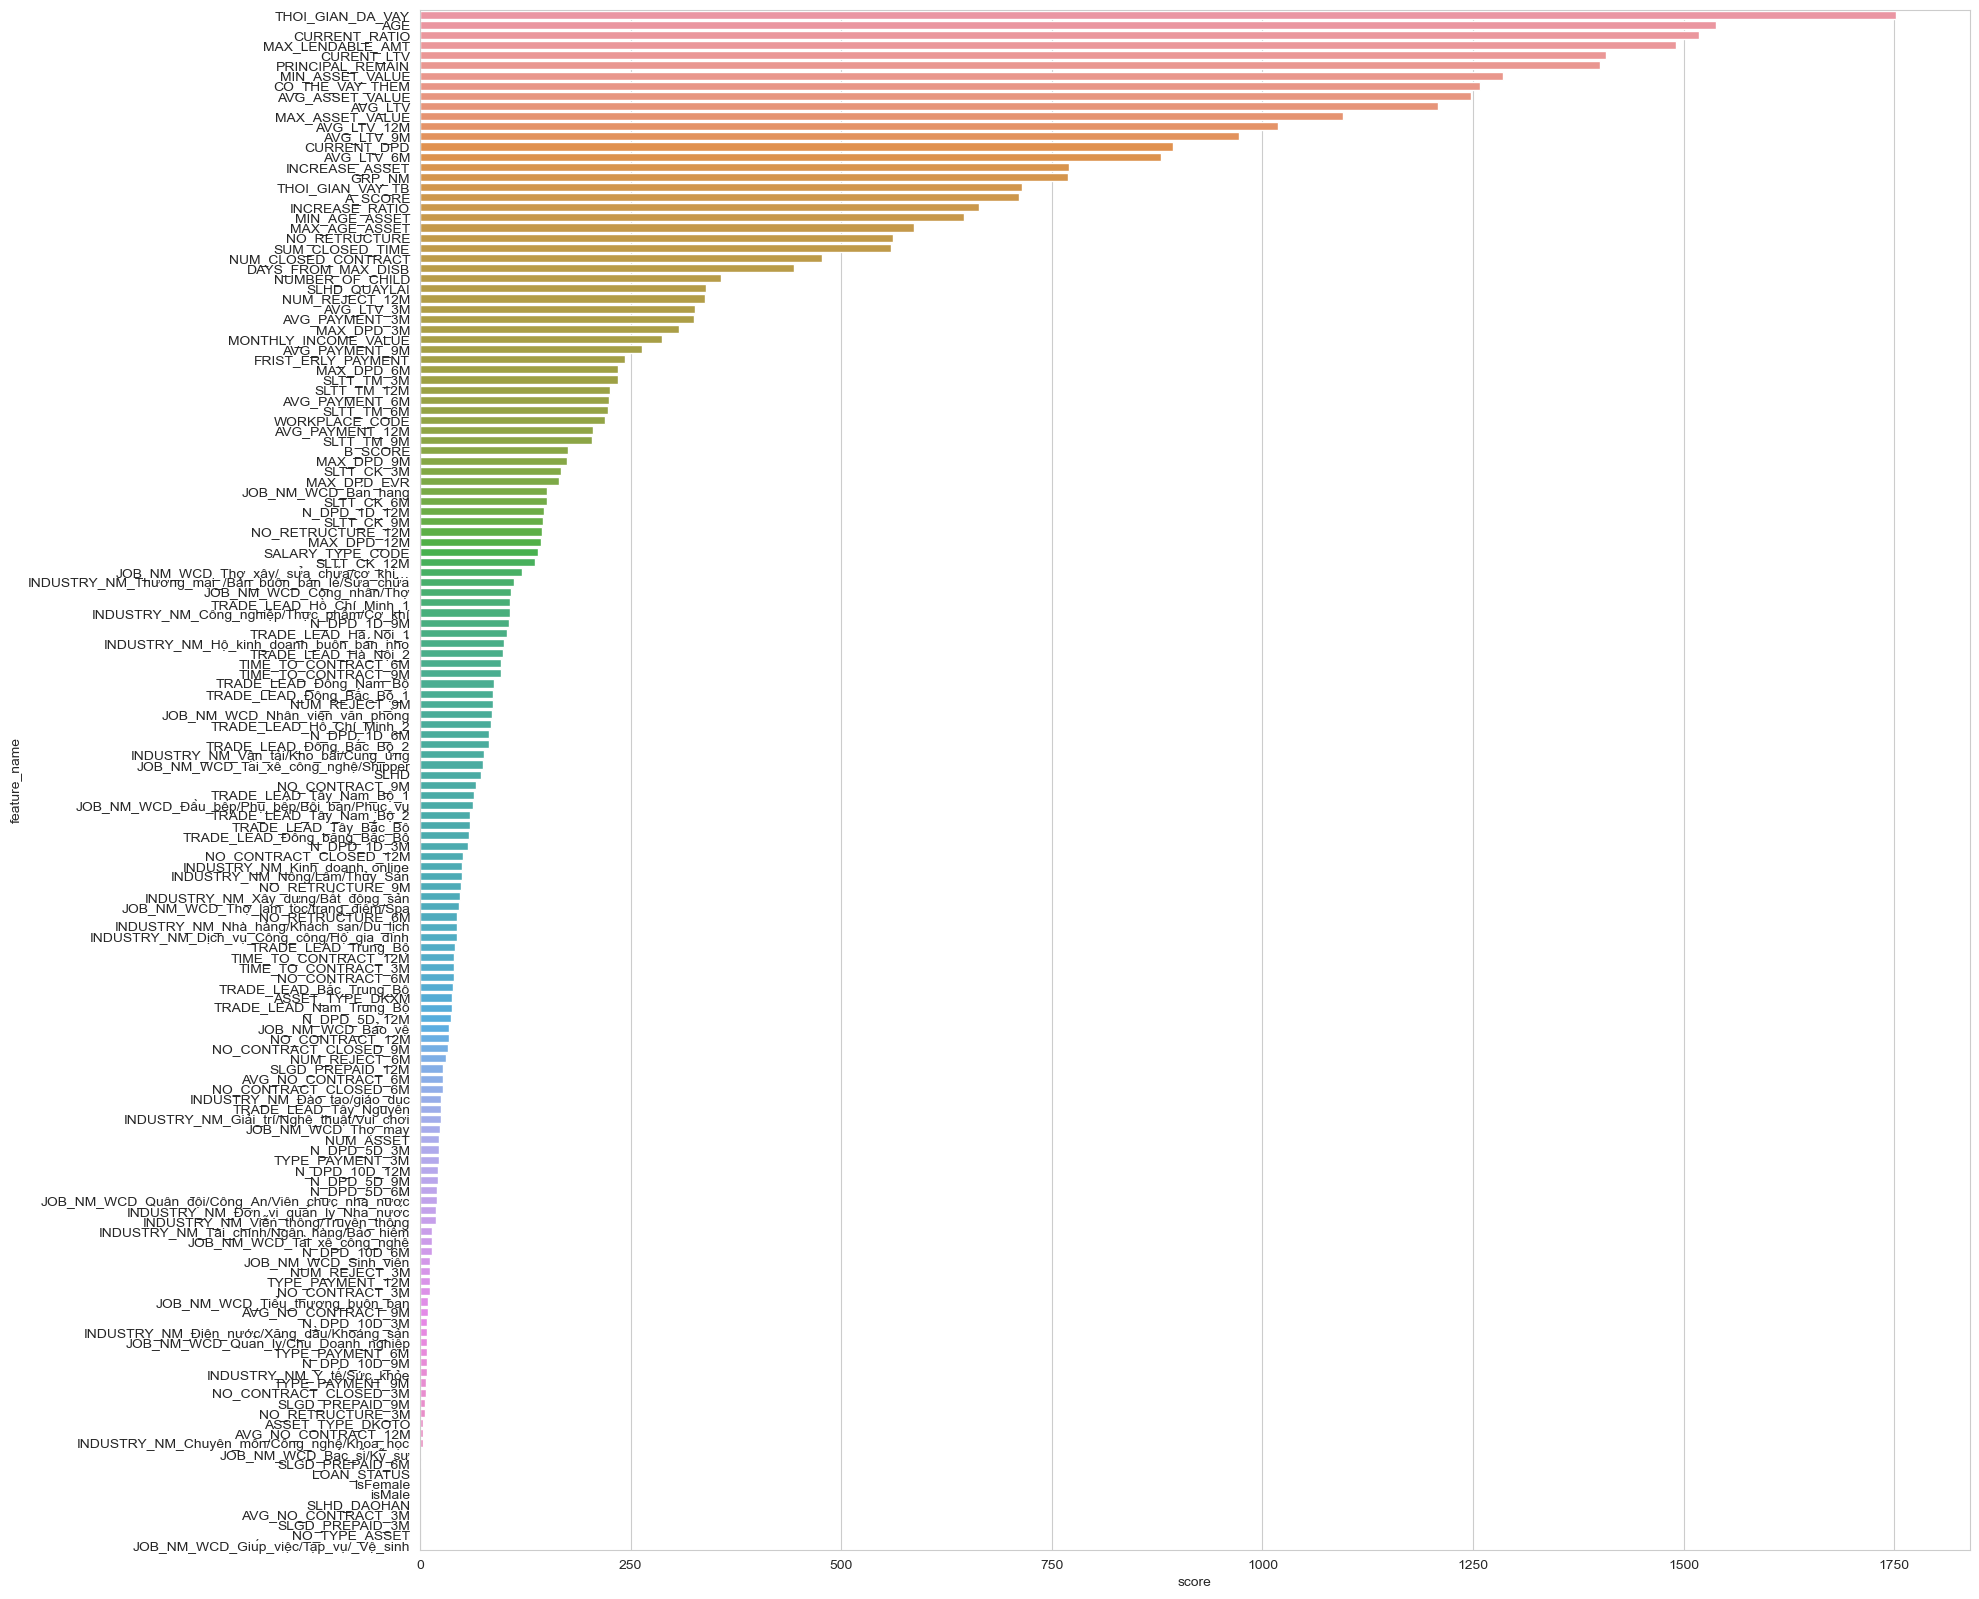

#########################
Fold 4
#########################
[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[100]	training's binary_logloss: 0.48093	training's auc: 0.846074	valid_1's binary_logloss: 0.485061	valid_1's auc: 0.842309
[200]	training's binary_logloss: 0.469081	training's auc: 0.854476	valid_1's binary_logloss: 0.477753	valid_1's auc: 0.847112
[300]	training's binary_logloss: 0.462573	training's auc: 0.859125	valid_1's binary_logloss: 0.475345	valid_1's auc: 0.84857
[400]	training's binary_logloss: 0.45715	training's auc: 0.862997	valid_1's binary_logloss: 0.473473	valid_1's auc: 0.849628
[500]	training's binary_logloss: 0.452319	training's auc: 0.866428	valid_1's binary_logloss: 0.471947	valid_1's auc: 0.85051
[600]	training's binary_logloss: 0.448054	training's auc: 0.869534	valid_1's binary_logloss: 0.471186	valid_1's auc: 0.850939
[700]	training's binary_logloss: 0.443869	training's auc: 0.87243	valid_1's binary_logloss: 0.470336	valid_1's auc: 0.851344
[80

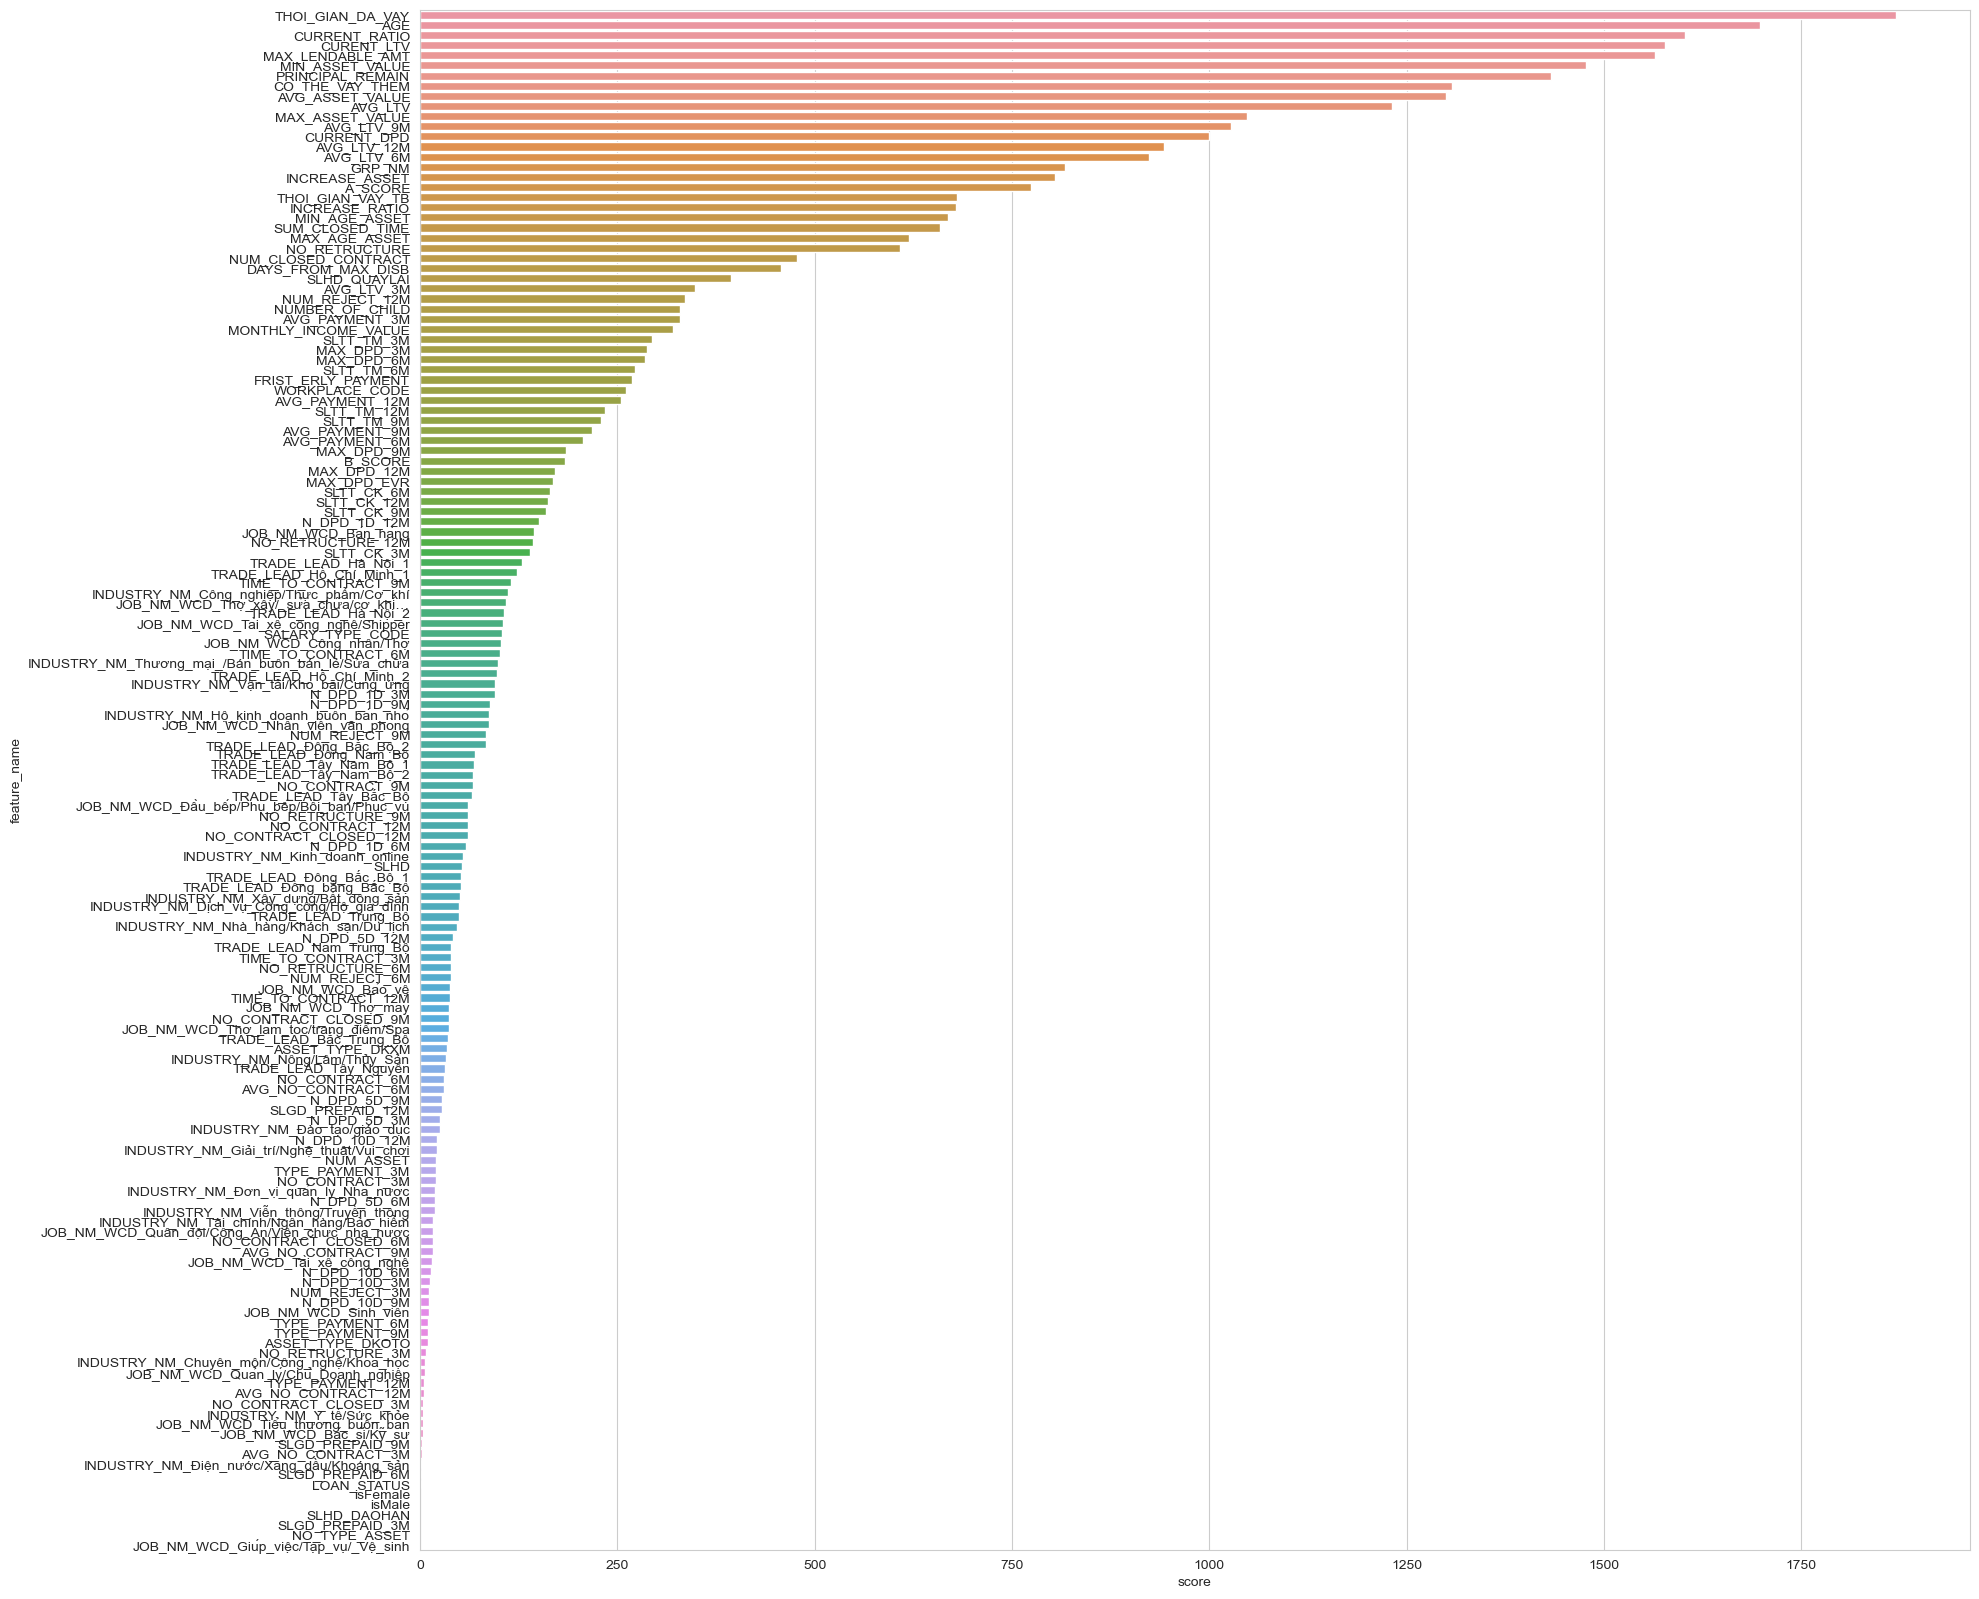

In [109]:
from sklearn.model_selection import GroupKFold, KFold
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
fold = GroupKFold(n_splits=5)
groups = train_df.CUSTOMER_CODE_2

oofs = np.zeros(train_df.shape[0])
models = []
best_estimations = []
for i, (train_index, valid_index) in enumerate(fold.split(train_df, groups=groups)):
    print("#"*25)
    print("Fold", i)
    print("#"*25)
    X_train = train_df.iloc[train_index]
    X_valid = train_df.iloc[valid_index]
    y_train = train_df.iloc[train_index][CONFIG.TARGET_COLUMNS]
    y_valid = train_df.iloc[valid_index][CONFIG.TARGET_COLUMNS]
    X_train = feature_engineering(X_train)
    X_valid = feature_engineering(X_valid)
    # X_train,X_valid = target_encoder(X_train, X_valid,'TRADE_LEAD', y_train)
    # X_train.drop(columns=['TRADE_LEAD'],inplace=True)
    # X_valid.drop(columns=['TRADE_LEAD'],inplace=True)
    # xgb_params = {
    #     'objective' : 'binary:logistic',
    #     'eval_metric':'logloss',
    #     'learning_rate': 0.1,
    #     'max_depth': 5,
    #     'n_estimators': 2000,
    #     'early_stopping_rounds': 50,
    #     'alpha':8,
    #     'tree_method':'gpu_hist',
    #     'subsample':0.8,
    #     'colsample_bytree': 0.8,
    #     'tree_method': 'gpu_hist',
    #     'seed':42,
    #     'use_label_encoder' : False}
    # model =  XGBClassifier(**xgb_params)
    # model.fit(X_train.astype('float32'), y_train,
    #         eval_set=[(X_train.astype('float32'), y_train), (X_valid.astype('float32'),y_valid)],
    #         verbose=100)
    model = LGBMClassifier(n_estimators=2000,
                           data_sample_strategy='goss',
                           metric='accuracy',
                           learning_rate=0.1,
                           max_depth=16,
                           colsample_bytree=0.8,
                           reg_alpha=8,
                           reg_lambda=32,
                           subsample=0.8,
                           device="gpu",
                           random_state=42)
    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric=["logloss","auc"],
              # categorical_feature=categorical_features,
              early_stopping_rounds=100,
              verbose=100)

    y_pred = model.predict(X_valid)
    y_pred_prob = model.predict_proba(X_valid)[:,1]

    oofs[valid_index] = y_pred_prob
    models.append(model)
    print('best iteration', model.best_iteration_)
    best_estimations.append((model.best_iteration_))
    print(classification_report(y_valid, y_pred, digits=4))
    print(accuracy_score(y_valid, y_pred_prob>0.5))

    feat_imp = pd.DataFrame({'feature_name': model.feature_name_,
                             'score': model.feature_importances_}).sort_values('score',ascending=False)
    plt.figure(figsize=(20,20))
    sns.barplot(x='score', y= 'feature_name', data=feat_imp)
    plt.show()

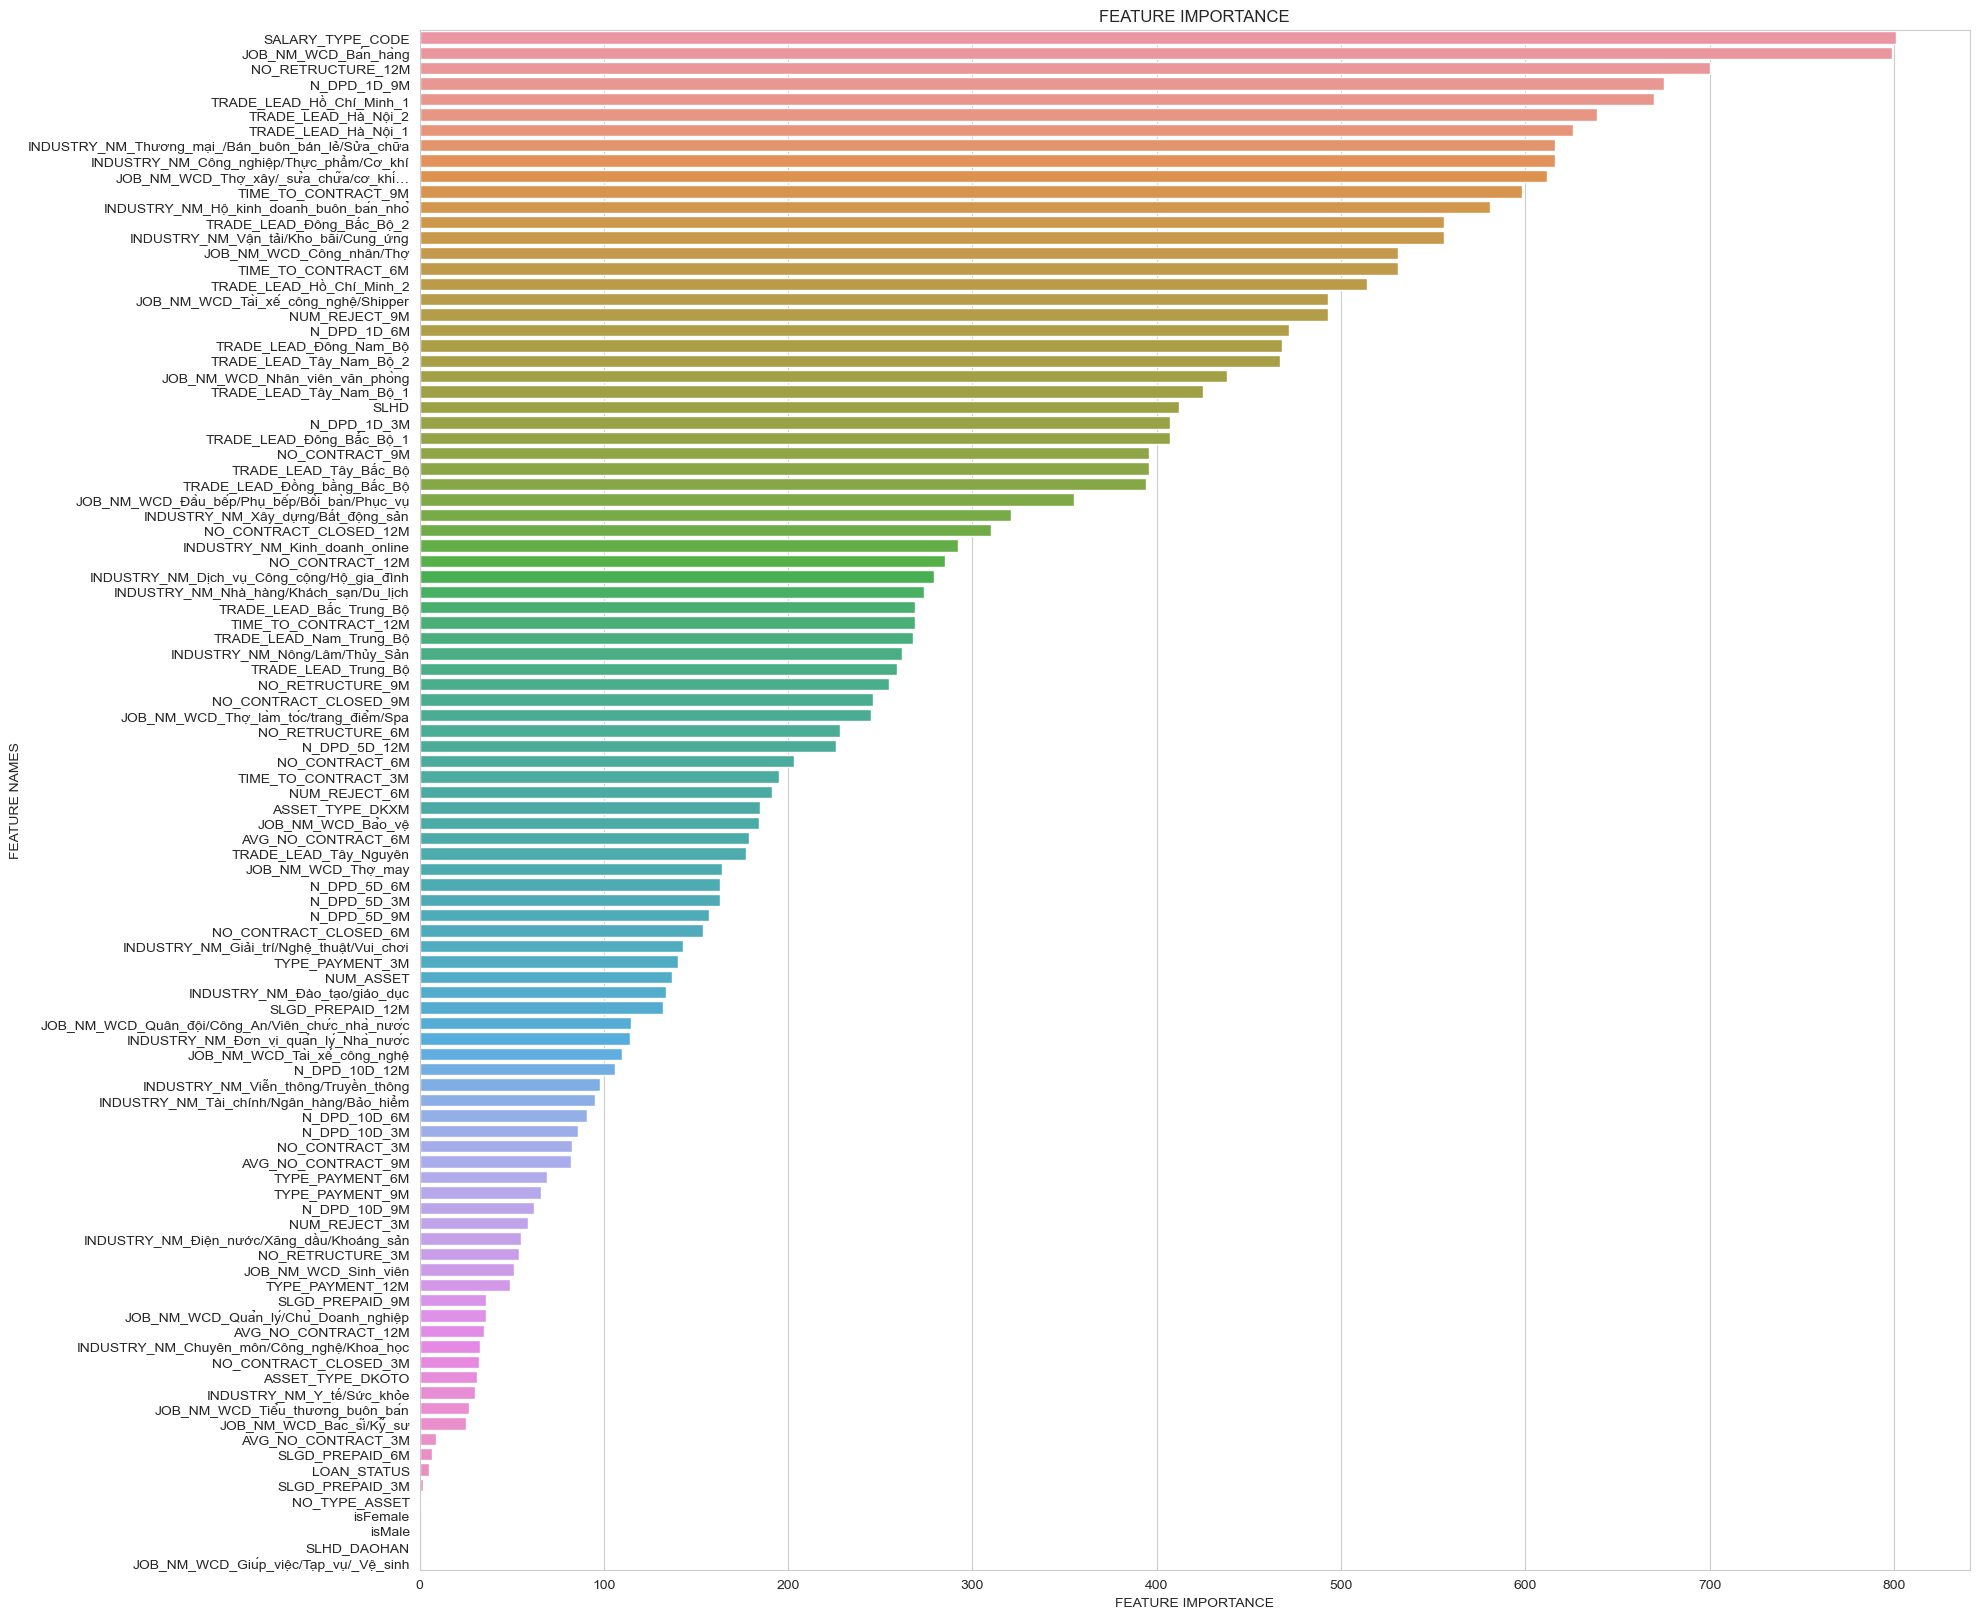

In [110]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.tail(100)
    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
feat_imp = {}
for model in models:
    for x, y in zip(model.feature_importances_, model.feature_name_):
        if y not in feat_imp:
            feat_imp[y] = x
        else:
            feat_imp[y]+=x
plot_feature_importance(list(feat_imp.values()),list(feat_imp.keys()),'')

In [111]:
from sklearn.metrics import f1_score, accuracy_score
scores = []; thresholds = []
best_score = 0; best_threshold = 0
train_labels = train_df[CONFIG.TARGET_COLUMNS]
for threshold in np.arange(0.3,0.9,0.01):
    print(f'{threshold:.02f}, ',end='')
    preds = (oofs>threshold).astype('int')
    m = accuracy_score(train_labels, preds)
    scores.append(m)
    thresholds.append(threshold)
    if m>best_score:
        best_score = m
        best_threshold = threshold

0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.90, 

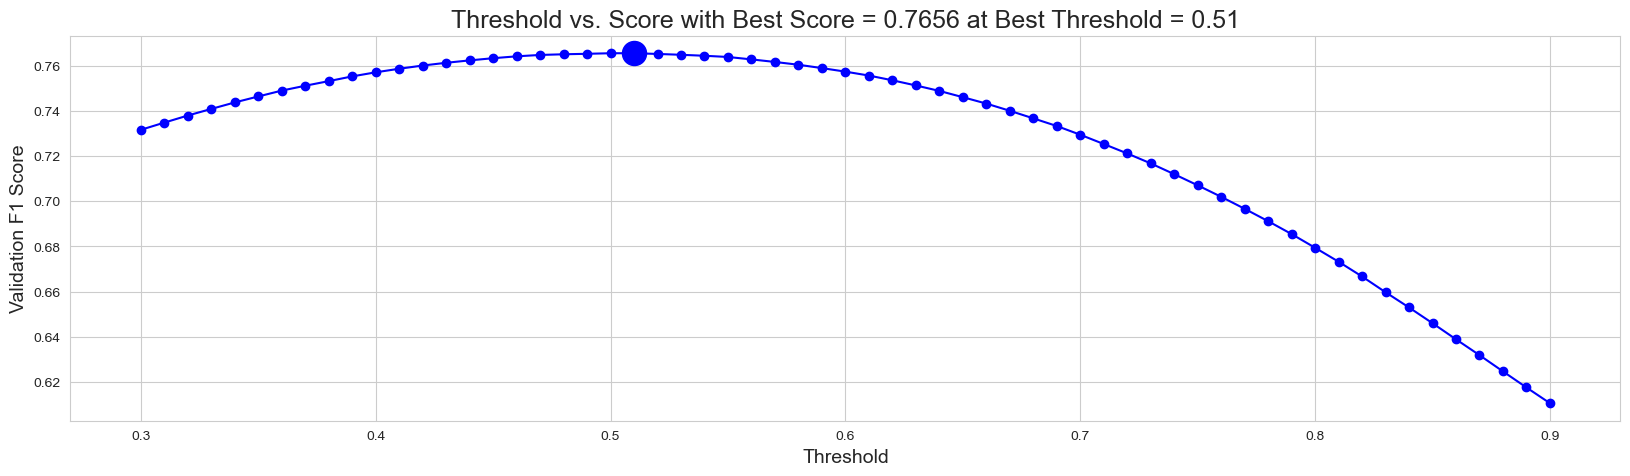

In [112]:
import matplotlib.pyplot as plt

# PLOT THRESHOLD VS. F1_SCORE
plt.figure(figsize=(20,5))
plt.plot(thresholds,scores,'-o',color='blue')
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1)
plt.xlabel('Threshold',size=14)
plt.ylabel('Validation F1 Score',size=14)
plt.title(f'Threshold vs. Score with Best Score = {best_score:.4f} at Best Threshold = {best_threshold:.3}',size=18)
plt.show()

### Train all

In [113]:
new_train_df = feature_engineering(train_df)

In [114]:
g_model = LGBMClassifier(**models[0].get_params())
g_model.n_estimators = int(np.max(best_estimations)) + 1
g_model.fit(new_train_df, train_labels,
            eval_set=[(new_train_df, train_labels)],
            eval_metric=["logloss","accuracy"],
            early_stopping_rounds=100,
            verbose=100)

[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[100]	training's binary_logloss: 0.481494
[200]	training's binary_logloss: 0.470364
[300]	training's binary_logloss: 0.464127
[400]	training's binary_logloss: 0.459167
[500]	training's binary_logloss: 0.454775
[600]	training's binary_logloss: 0.450907
[700]	training's binary_logloss: 0.447463
[800]	training's binary_logloss: 0.444093
[900]	training's binary_logloss: 0.44103
[1000]	training's binary_logloss: 0.437972
[1100]	training's binary_logloss: 0.435135
[1200]	training's binary_logloss: 0.432173
[1300]	training's binary_logloss: 0.429509
[1400]	training's binary_logloss: 0.427052
[1500]	training's binary_logloss: 0.424554
[1600]	training's binary_logloss: 0.42219
[1700]	training's binary_logloss: 0.419828
[1800]	training's binary_logloss: 0.417685
[1900]	training's binary_logloss: 0.415452
[2000]	training's binary_logloss: 0.413243


LGBMClassifier(colsample_bytree=0.8, data_sample_strategy='goss', device='gpu',
               max_depth=16, metric='accuracy', n_estimators=2001,
               random_state=42, reg_alpha=8, reg_lambda=32, subsample=0.8)

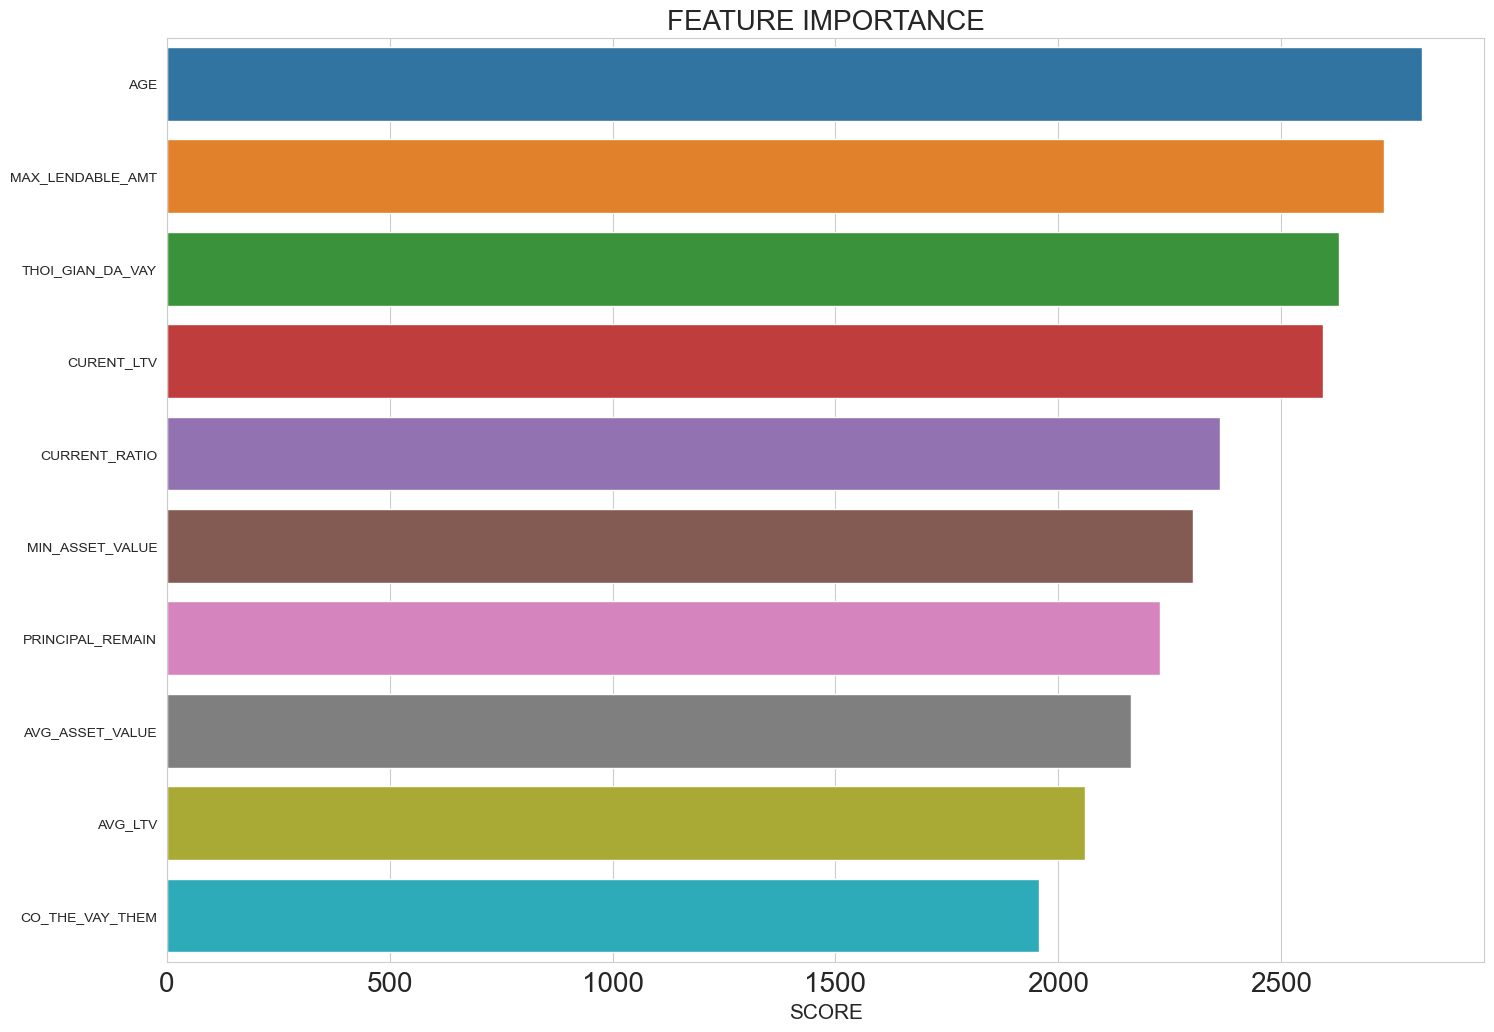

In [115]:
feat_imp = pd.DataFrame({'feature_name': g_model.feature_name_,
                         'score': g_model.feature_importances_}).sort_values('score',ascending=False)
plt.figure(figsize=(17,12))
sns.barplot(x='score', y= 'feature_name', data=feat_imp.head(10))
plt.xlabel('SCORE', fontsize=15)
plt.ylabel('')
plt.title("FEATURE IMPORTANCE", fontsize=20)
plt.xticks(fontsize=20)
# labels = ['Tuổi', 'Giá trị TSDB thấp nhất', 'Giá trị TSDB trung bình', 'Số tiền được vay tối đa', 'Có thể vay thêm', 'Dư nợ','Thời gian đã vay', 'LTV khoan vay hiện tại','Giá trị TSDB cao nhất','Trung bình LTV']
# labels = ['Số tiền được vay tối đa','Giá trị TSDB thấp nhất','Giá trị TSDB trung bình','Tuổi','Trung bình LTV','Dư nợ', 'LTV hiện tại','Có thể vay thêm','Giá trị TSDB cao nhất', 'Trung bình LTV 12 tháng' ]
# plt.yticks(ticks=[int(i) for i in range(10)], labels=labels,fontsize=20)

plt.show()

## Predict

### CV predict

In [116]:
# _, new_test_df = target_encoder(new_train_df, new_test_df,'TRADE_LEAD', train_labels)
new_test_df = feature_engineering(test_df)
y_pred_prob = np.zeros(new_test_df.shape[0])

for model in models:
    y_pred_prob+=model.predict_proba(new_test_df)[:,1]/5

In [117]:
test_labels = test_df[CONFIG.TARGET_COLUMNS]

In [118]:
y_preds = y_pred_prob>best_threshold
print(classification_report(test_labels, y_preds, digits=4))

              precision    recall  f1-score   support

           0     0.7570    0.7487    0.7528     85384
           1     0.7719    0.7797    0.7758     93135

    accuracy                         0.7649    178519
   macro avg     0.7645    0.7642    0.7643    178519
weighted avg     0.7648    0.7649    0.7648    178519



In [119]:
from sklearn.metrics import accuracy_score, average_precision_score
print(accuracy_score(test_labels, y_preds))

0.7648709661156515


### All predict

In [120]:
y_pred_prob = np.zeros(new_test_df.shape[0])
y_pred_prob = g_model.predict_proba(new_test_df)[:,1]

In [121]:
y_preds = y_pred_prob>best_threshold
print(classification_report(test_labels, y_preds, digits=4))

              precision    recall  f1-score   support

           0     0.7576    0.7506    0.7541     85384
           1     0.7733    0.7799    0.7766     93135

    accuracy                         0.7659    178519
   macro avg     0.7654    0.7652    0.7653    178519
weighted avg     0.7658    0.7659    0.7658    178519



In [122]:
from sklearn.metrics import accuracy_score, average_precision_score
print(accuracy_score(test_labels, y_preds))

0.7658568555727961


## Model Analyzing

In [31]:
# AGE = sorted(new_train_df['AGE'].unique())
# matrix = np.zeros((new_train_df.shape[0],len(AGE)))
# new_train_copy = new_train_df.copy()
# for i in tqdm(range(len(AGE))):
#     new_train_copy['AGE'] = AGE[i]
#     for model in models:
#         matrix[:,i] += model.predict_proba(new_train_copy)[:,1]/5

In [32]:
# plt.figure(figsize=(17, 10))
# y = np.mean(matrix,axis=0)
# y_std = np.std(matrix, axis=0)
# ax = sns.lineplot(x=AGE,y=y)
# sns.lineplot(x=AGE, y=np.max(matrix, axis=0))
# plt.xlabel('AGE')
# plt.ylabel('UPSELL_PROBA')
# _ = plt.xticks(AGE)
# ax.fill_between(AGE, y- 0.5*y_std, y+0.5*y_std, alpha=0.2)

In [33]:
# PRINCIPAL_REMAIN = sorted(new_train_df['PRINCIPAL_REMAIN'].unique())
# PRINCIPAL_REMAINS = np.linspace(0, 3*10**7,200)
# principal_remains_matrix = np.zeros((new_train_df.shape[0],len(PRINCIPAL_REMAINS)))
# new_train_copy = new_train_df.copy()
# for i in tqdm(range(len(PRINCIPAL_REMAINS))):
#     new_train_copy['PRINCIPAL_REMAIN'] = PRINCIPAL_REMAINS[i]
#     principal_remains_matrix[:,i] += g_model.predict_proba(new_train_copy)[:,1]

In [34]:
# plt.figure(figsize=(17, 10))
# y = np.mean(principal_remains_matrix,axis=0)
# y_std = np.std(principal_remains_matrix, axis=0)
# ax = sns.lineplot(x=PRINCIPAL_REMAINS,y=y, linewidth=2)
# plt.xlabel('PRINCIPAL_REMAINS')
# plt.ylabel('UPSELL_PROBA')
# plt.title("PARTIAL DEPENDENCY PLOT")

In [35]:
# sns.boxplot(train_df[train_df['PRINCIPAL_REMAIN']<0.5*10**8]['PRINCIPAL_REMAIN'])

In [36]:
# train_df[train_df['PRINCIPAL_REMAIN']<0.2*10**8]['PRINCIPAL_REMAIN'].max()

In [37]:
# sns.boxplot(new_train_df[new_train_df['CO_THE_VAY_THEM']<3*1E7]['CO_THE_VAY_THEM'])

In [38]:
# CO_THE_VAY_THEM = np.linspace(0, 3*1E7,200)
# CO_THE_VAY_THEM_matrix = np.zeros((new_train_df.shape[0],len(CO_THE_VAY_THEM)))
# new_train_copy = new_train_df.copy()
# for i in tqdm(range(len(CO_THE_VAY_THEM))):
#     new_train_copy['CO_THE_VAY_THEM'] = CO_THE_VAY_THEM[i]
#     CO_THE_VAY_THEM_matrix[:,i] = g_model.predict_proba(new_train_copy)[:,1]

In [39]:
# plt.figure(figsize=(17, 10))
# y = np.mean(CO_THE_VAY_THEM_matrix,axis=0)
# ax = sns.lineplot(x=CO_THE_VAY_THEM,y=y, linewidth=5)
# sns.lineplot(x=CO_THE_VAY_THEM,y=0.4, linestyle='dashed', linewidth=5)
# plt.legend(labels=["partial dependency","threshold"],prop={'size': 15})
# plt.xlabel('CO_THE_VAY_THEM', fontsize=15)
# plt.ylabel('UPSELL_PROBA', fontsize=15)
# plt.title("PARTIAL DEPENDENCY PLOT", fontsize=20)
# _ = plt.xticks(fontsize=15)
# _ = plt.yticks(fontsize=15)

In [40]:
# sns.boxplot(new_train_df['THOI_GIAN_DA_VAY'])

In [41]:
# new_train_df['THOI_GIAN_DA_VAY'].min()

In [42]:
# THOI_GIAN_DA_VAY = np.linspace(58, 380,200)
# THOI_GIAN_DA_VAY_matrix = np.zeros((new_train_df.shape[0],len(THOI_GIAN_DA_VAY)))
# new_train_copy = new_train_df.copy()
# for i in tqdm(range(len(THOI_GIAN_DA_VAY))):
#     new_train_copy['THOI_GIAN_DA_VAY'] = THOI_GIAN_DA_VAY[i]
#     THOI_GIAN_DA_VAY_matrix[:,i] += g_model.predict_proba(new_train_copy)[:,1]

In [43]:
# plt.figure(figsize=(17, 10))
# y = np.mean(THOI_GIAN_DA_VAY_matrix,axis=0)
# ax = sns.lineplot(x=THOI_GIAN_DA_VAY,y=y, linewidth=2)
# sns.lineplot(x=THOI_GIAN_DA_VAY,y=0.4, linestyle='dashed', linewidth=1)
# plt.legend(labels=["partial dependency","threshold"])
# plt.xlabel('THOI_GIAN_DA_VAY')
# plt.ylabel('UPSELL_PROBA')
# plt.title("PARTIAL DEPENDENCY PLOT")

In [44]:
# sns.boxplot(new_train_df[new_train_df['THOI_GIAN_VAY_TB']!= -999]['THOI_GIAN_VAY_TB'])

In [45]:
# THOI_GIAN_VAY_TB = np.linspace(0, 10, 200)
# TTHOI_GIAN_VAY_TB_matrix = np.zeros((new_train_df.shape[0],len(THOI_GIAN_VAY_TB)))
# new_train_copy = new_train_df.copy()
# for i in tqdm(range(len(THOI_GIAN_VAY_TB))):
#     new_train_copy['THOI_GIAN_VAY_TB'] = THOI_GIAN_VAY_TB[i]
#     TTHOI_GIAN_VAY_TB_matrix[:,i] = g_model.predict_proba(new_train_copy)[:,1]

In [46]:
# plt.figure(figsize=(17, 10))
# y = np.mean(TTHOI_GIAN_VAY_TB_matrix,axis=0)
# ax = sns.lineplot(x=THOI_GIAN_VAY_TB,y=y, linewidth=2)
# sns.lineplot(x=THOI_GIAN_VAY_TB,y=0.4, linestyle='dashed', linewidth=1)
# plt.legend(labels=["partial dependency","threshold"])
# plt.xlabel('THOI_GIAN_VAY_TB')
# plt.ylabel('UPSELL_PROBA')
# plt.title("PARTIAL DEPENDENCY PLOT")

## Inference

In [47]:
infer_data = pd.read_csv(CONFIG.INFER_DF)

In [48]:
new_infer_df = feature_engineering(infer_data)
y_pred_prob = np.zeros(new_infer_df.shape[0])
for model in models:
    y_pred_prob+=model.predict_proba(new_infer_df)[:,1]/5

In [49]:
output = pd.DataFrame()
output['CUSTOMER_CODE_2'] = infer_data['CUSTOMER_CODE_2']
output['proba'] = y_pred_prob

In [50]:
output.sort_values('proba', ascending=False, inplace=True)

In [51]:
output.reset_index(inplace=True, drop=True)

In [52]:
output[output.proba>0.5]

CUSTOMER_CODE_2     proba
0             20199902  0.998977
1             21188547  0.998899
2             21505888  0.998889
3           2234758294  0.998467
4             20169722  0.998394
...                ...       ...
26735         20149355  0.500298
26736       2283004755  0.500296
26737       2250039460  0.500287
26738         21995008  0.500208
26739       2275346096  0.500046

[26740 rows x 2 columns]

In [53]:
output.to_csv('../outputs/output.csv',index=False)

<AxesSubplot:xlabel='proba', ylabel='Density'>

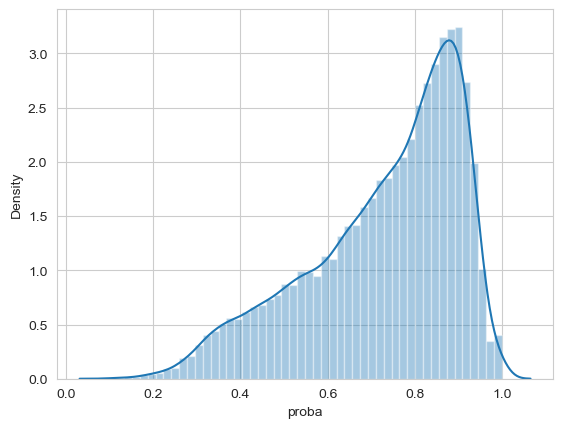

In [54]:
sns.distplot(output['proba'])

In [55]:
output[output.proba>0.5].shape

(26740, 2)

In [56]:
output[output.proba<0.5].shape

(4018, 2)